# Generating SQL for SQLite using Ollama, ChromaDB
This notebook runs through the process of using the `vanna` Python package to generate SQL using AI (RAG + LLMs) including connecting to a database and training. If you're not ready to train on your own database, you can still try it using a sample [SQLite database](app.md).


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Which LLM do you want to use?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-openai-vanna-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI via Vanna.AI (Recommended)</div>
        <small class="w-full">Use Vanna.AI for free to generate your queries</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-standard-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">OpenAI</div>
        <small class="w-full">Use OpenAI with your own API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-openai-azure-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Azure OpenAI</div>
        <small class="w-full">If you have OpenAI models deployed on Azure</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> Ollama</div>
        <small class="w-full">Use Ollama locally for free. Requires additional setup.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-mistral-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Mistral via Mistral API</div>
        <small class="w-full">If you have a Mistral API key</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-other-llm-chromadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other LLM</div>
        <small class="w-full">If you have a different LLM model</small>
      </div>
    </a>
  </li>
    
</ul>
    


<h3 class="mb-5 text-lg font-medium text-gray-900 dark:text-white">Where do you want to store the 'training' data?</h3>
<ul class="grid w-full gap-6 md:grid-cols-2">
    
  <li>
    <a href="../sqlite-ollama-vannadb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Vanna Hosted Vector DB (Recommended)</div>
        <small class="w-full">Use Vanna.AIs hosted vector database (pgvector) for free. This is usable across machines with no additional setup.</small>
      </div>
    </a>
  </li>
    
  <li>
    <span class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border bg-white p-5 border-blue-600 text-blue-600 dark:bg-gray-800 dark:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold"><span class="hidden">[Selected]</span> ChromaDB</div>
        <small class="w-full">Use ChromaDBs open-source vector database for free locally. No additional setup is necessary -- all database files will be created and stored locally.</small>
      </div>
    </span>
  </li>
  
  <li>
    <a href="../sqlite-ollama-marqo/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Marqo</div>
        <small class="w-full">Use Marqo locally for free. Requires additional setup. Or use their hosted option.</small>
      </div>
    </a>
  </li>
    
  <li>
    <a href="../sqlite-ollama-other-vectordb/" class="inline-flex w-full cursor-pointer items-center justify-between rounded-lg border border-gray-200 bg-white p-5 text-gray-500 hover:bg-gray-100 hover:text-gray-600 peer-checked:border-blue-600 peer-checked:text-blue-600 dark:border-gray-700 dark:bg-gray-800 dark:text-gray-400 dark:hover:bg-gray-700 dark:hover:text-gray-300 dark:peer-checked:text-blue-500">
      <div class="block">
        <div class="w-full text-lg font-semibold">Other VectorDB</div>
        <small class="w-full">Use any other vector database. Requires additional setup.</small>
      </div>
    </a>
  </li>
    
</ul>
    

## Setup

In [1]:
import sys
print("\n".join(sys.path))

/home/gongai/anaconda3/envs/vanna/lib/python311.zip
/home/gongai/anaconda3/envs/vanna/lib/python3.11
/home/gongai/anaconda3/envs/vanna/lib/python3.11/lib-dynload

/home/gongai/.local/lib/python3.11/site-packages
/home/gongai/anaconda3/envs/vanna/lib/python3.11/site-packages
/home/gongai/projects/wgong/api_keys/apikeystore
/home/gongai/projects/wgong/ssadata/src


In [2]:
import warnings
import re

warnings.filterwarnings('ignore', category=DeprecationWarning, message='^Number of requested results')
# warnings.filterwarnings('ignore', category=DeprecationWarning, message=re.escape(r'^Some regex pattern'))

import os

import re
from time import time
from datetime import datetime 

from vanna.ollama import Ollama
from vanna.chromadb.chromadb_vector import ChromaDB_VectorStore

In [3]:
model_name = "llama3.1"
CONFIG = {
    'model': model_name,   # 'mistral' # "starcoder2"
    'options': {
        'gpu': True,
    }
}

file_db = "~/Downloads/datasets/chinook.db"

clean_and_train = True  # False  

sql_id = 1
NUM_RETRY = 3

allow_llm_to_see_data = True
# allow_llm_to_see_data (bool): Whether to allow the LLM to see the data (for the purposes of introspecting the data to generate the final SQL).

In [4]:
class MyVanna(ChromaDB_VectorStore, Ollama):
    def __init__(self, config=None):
        ChromaDB_VectorStore.__init__(self, config=config)
        Ollama.__init__(self, config=config)

def remove_collections(collection_name=None, ACCEPTED_TYPES = ["sql", "ddl", "documentation"]):
    if not collection_name:
        collections = ACCEPTED_TYPES
    elif isinstance(collection_name, str):
        collections = [collection_name]
    elif isinstance(collection_name, list):
        collections = collection_name
    else:
        print(f"\t{collection_name} is unknown: Skipped")
        return

    for c in collections:
        if not c in ACCEPTED_TYPES:
            print(f"\t{c} is unknown: Skipped")
            continue
            
        # print(f"vn.remove_collection('{c}')")
        vn.remove_collection(c)

def strip_brackets(ddl):
    """
    This function removes square brackets from table and column names in a DDL script.
    
    Args:
        ddl (str): The DDL script containing square brackets.
    
    Returns:
        str: The DDL script with square brackets removed.
    """
    # Use regular expressions to match and replace square brackets
    pattern = r"\[([^\]]+)]"  # Match any character except ] within square brackets
    return re.sub(pattern, r"\1", ddl)

def my_vn_ask(question, sql_id, allow_llm_to_see_data=False, num_retry=NUM_RETRY, separator=80*'='):
    # allow retry by appending error msg to question
    print(f"\n{separator}\n# QUESTION - {sql_id}:  {question}\n{separator}\n")
    sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
        return sql, df, fig, err_msg

    for i_retry in range(num_retry-1):
        msg = f"*** RETRY {i_retry+1} ***" 
        print(msg)
        question = f"""
        For the question {question}, 
        the generated SQL statement {sql} results in the following exception {err_msg} .
        Please fix the error and re-generate the SQL
        """
        
        sql, df, fig, err_msg = vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
        if not err_msg or ("[ERROR-SQL]" not in err_msg) and ("[ERROR-DB]" not in err_msg):
            break       

    return sql, df, fig, err_msg  

In [5]:
vn = MyVanna(config=CONFIG)

In [6]:
hostname = os.uname().nodename
print("Hostname:", hostname)

Hostname: ducklover1


In [7]:
file_db = os.path.abspath(os.path.expanduser(file_db))
vn.connect_to_sqlite(file_db)

In [8]:
vn.run_sql_is_set

True

In [9]:
if clean_and_train:
    remove_collections()

## Training

### [SQLite sample database](https://www.sqlitetutorial.net/sqlite-sample-database/)

You only need to train once. Do not train again unless you want to add more training data.

In [10]:
df_ddl = vn.run_sql("SELECT type, sql FROM sqlite_master WHERE sql is not null")

In [11]:
df_ddl

,type,sql
0,table,"CREATE TABLE ""albums""\r\n(\r\n [AlbumId] IN..."
1,table,"CREATE TABLE sqlite_sequence(name,seq)"
2,table,"CREATE TABLE ""artists""\r\n(\r\n [ArtistId] ..."
3,table,"CREATE TABLE ""customers""\r\n(\r\n [Customer..."
4,table,"CREATE TABLE ""employees""\r\n(\r\n [Employee..."
5,table,"CREATE TABLE ""genres""\r\n(\r\n [GenreId] IN..."
6,table,"CREATE TABLE ""invoices""\r\n(\r\n [InvoiceId..."
7,table,"CREATE TABLE ""invoice_items""\r\n(\r\n [Invo..."
8,table,"CREATE TABLE ""media_types""\r\n(\r\n [MediaT..."
9,table,"CREATE TABLE ""playlists""\r\n(\r\n [Playlist..."


In [12]:
if clean_and_train:
    for ddl in df_ddl['sql'].to_list():
        ddl = strip_brackets(ddl)
        vn.train(ddl=ddl)

    # Sometimes you may want to add documentation about your business terminology or definitions.
    vn.train(documentation="In the chinook database invoice means order")

    doc_str = """
    In the 'customers' table, address column names do not have 'Billing' prefix, 
    e.g. country column name is 'country', not 'BillingCountry'
    """
    vn.train(documentation=doc_str)


Adding ddl: CREATE TABLE "albums"
(
    AlbumId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Title NVARCHAR(160)  NOT NULL,
    ArtistId INTEGER  NOT NULL,
    FOREIGN KEY (ArtistId) REFERENCES "artists" (ArtistId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TABLE sqlite_sequence(name,seq)
Adding ddl: CREATE TABLE "artists"
(
    ArtistId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Name NVARCHAR(120)
)
Adding ddl: CREATE TABLE "customers"
(
    CustomerId INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    FirstName NVARCHAR(40)  NOT NULL,
    LastName NVARCHAR(20)  NOT NULL,
    Company NVARCHAR(80),
    Address NVARCHAR(70),
    City NVARCHAR(40),
    State NVARCHAR(40),
    Country NVARCHAR(40),
    PostalCode NVARCHAR(10),
    Phone NVARCHAR(24),
    Fax NVARCHAR(24),
    Email NVARCHAR(60)  NOT NULL,
    SupportRepId INTEGER,
    FOREIGN KEY (SupportRepId) REFERENCES "employees" (EmployeeId) 
		ON DELETE NO ACTION ON UPDATE NO ACTION
)
Adding ddl: CREATE TAB

In [13]:
# show training data
training_data = vn.get_training_data()
training_data

,id,question,content,training_data_type
0,039f9d54-59f7-5f29-8c04-14dbc3e95671-ddl,None,"CREATE TABLE ""artists""\r\n(\r\n ArtistId IN...",ddl
1,0db84e3d-ef41-563c-803e-21c1b985dc19-ddl,None,"CREATE TABLE ""invoices""\r\n(\r\n InvoiceId ...",ddl
2,10cba811-ddba-5042-9e90-d764dfcd1629-ddl,None,"CREATE INDEX IFK_InvoiceCustomerId ON ""invoice...",ddl
3,2c711317-b93d-5f60-a728-cb1c6fcbc040-ddl,None,"CREATE INDEX IFK_CustomerSupportRepId ON ""cust...",ddl
4,37319c81-65f7-50ee-956b-795de244bee5-ddl,None,"CREATE TABLE sqlite_stat1(tbl,idx,stat)",ddl
5,40bd77cd-e1de-5872-8693-624117ff413c-ddl,None,"CREATE INDEX IFK_InvoiceLineInvoiceId ON ""invo...",ddl
6,41130543-7164-562a-90a7-0fd0a409c154-ddl,None,"CREATE TABLE ""albums""\r\n(\r\n AlbumId INTE...",ddl
7,458debc8-8082-5450-a17a-66028bd55ace-ddl,None,"CREATE TABLE ""playlists""\r\n(\r\n PlaylistI...",ddl
8,4815f3fd-925b-53ce-9dfa-0e4285d5abd3-ddl,None,"CREATE TABLE ""invoice_items""\r\n(\r\n Invoi...",ddl
9,48d484e9-984c-58ff-b391-75521c69d486-ddl,None,"CREATE INDEX IFK_PlaylistTrackTrackId ON ""play...",ddl


```sql

SELECT name FROM sqlite_master WHERE type = 'table';

```

```sql

SELECT c.CustomerId, SUM(il.Quantity) AS TotalAlbums
FROM Customers c
JOIN invoices i  ON c.CustomerId = i.CustomerId
JOIN invoice_items il ON i.InvoiceId = il.InvoiceId
GROUP BY c.CustomerId
ORDER BY TotalAlbums DESC
LIMIT 5

```


## Ask AI
Whenever you ask a new question, it will find the 10 most relevant pieces of training data and use it as part of the LLM prompt to generate the SQL.

### warm-up





# QUESTION :  How many customers are there



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT COUNT(CustomerId) FROM customers


[( <DataFrame> )]
queried dataframe



,COUNT(CustomerId)
0,59



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.bar(x='COUNT(CustomerId)', y=[0], title='Number of Customers')
else:
    fig = px.bar(df, x='COUNT(CustomerId)', title='Number of Customers')

fig.update_layout(xaxis_title='', yaxis_title='')

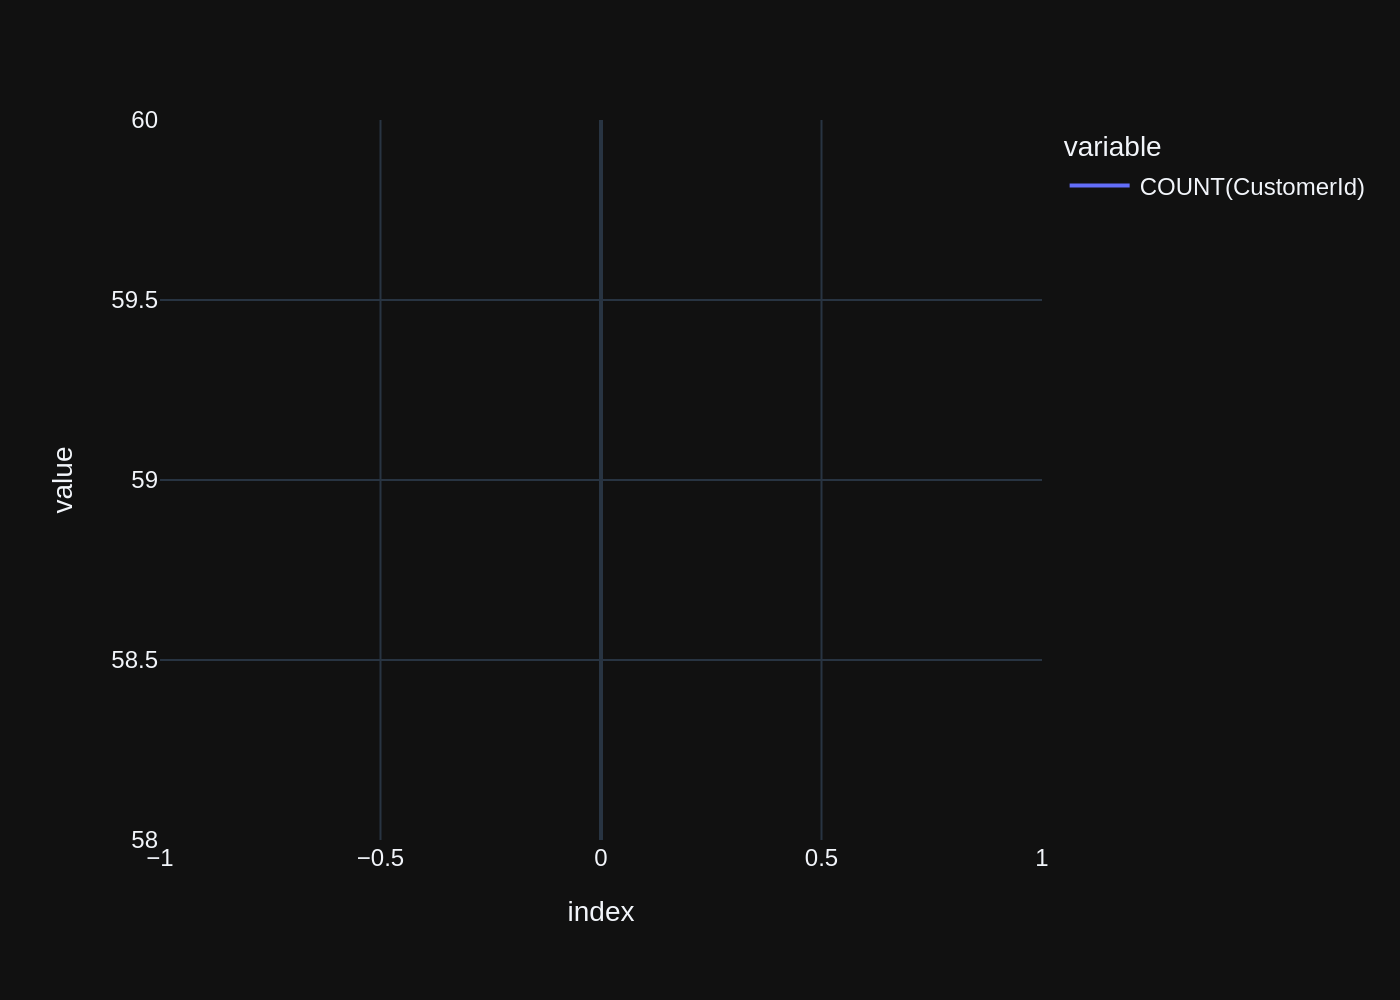

elapsed_time = 5.496435165405273


In [14]:
ts_start = time()
question = "How many customers are there"
resp = vn.ask_adaptive(question=question)
ts_stop = time()
elapsed_time = ts_stop - ts_start
print(f"elapsed_time = {elapsed_time}")

### Loop over questions

In [15]:
questions = [
    "Can you list all tables in the SQLite database catalog?",
    "which table stores customer's orders",
    "How many customers are there",
    "what are the top 5 countries that customers come from?",
    "List all albums and their corresponding artist names  ",
    """Find all tracks with a name containing "What" (case-insensitive) """,
    "Get the total number of invoices for each customer",
    "Find the total number of invoices per country",
    "List all invoices with a total exceeding $10",
    "Find all invoices since 2010 and the total amount invoiced:",
    "List all employees and their reporting manager's name (if any):",
    " Get the average invoice total for each customer:",
    "Find the top 5 most expensive tracks (based on unit price):",
    "List all genres and the number of tracks in each genre:",
    "Get all genres that do not have any tracks associated with them:",
    "List all customers who have not placed any orders:",
    """ 
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    """,
    "List all customers from Canada and their email addresses:",
    "Find the customer with the most invoices ",
    "Find the customer who bought the most albums in total quantity (across all invoices):",
    """      
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    """,
    """  
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    """,
    "Get all playlists containing at least 10 tracks and the total duration of those tracks:",
    "Identify artists who have albums with tracks appearing in multiple genres:",
]





# QUESTION  - 2:  Can you list all tables in the SQLite database catalog?



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT name FROM sqlite_master WHERE type='table';


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table';


[( <DataFrame> )]
queried dataframe



,name
0,albums
1,sqlite_sequence
2,artists
3,customers
4,employees
5,genres
6,invoices
7,invoice_items
8,media_types
9,playlists



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.bar(x=df['name'])
else:
    fig = px.histogram(df, x='name')

fig.update_layout(
    title_text="Tables in SQLite Database Catalog",
    xaxis_title_text="Table Name",
    yaxis_title_text="Count"
)

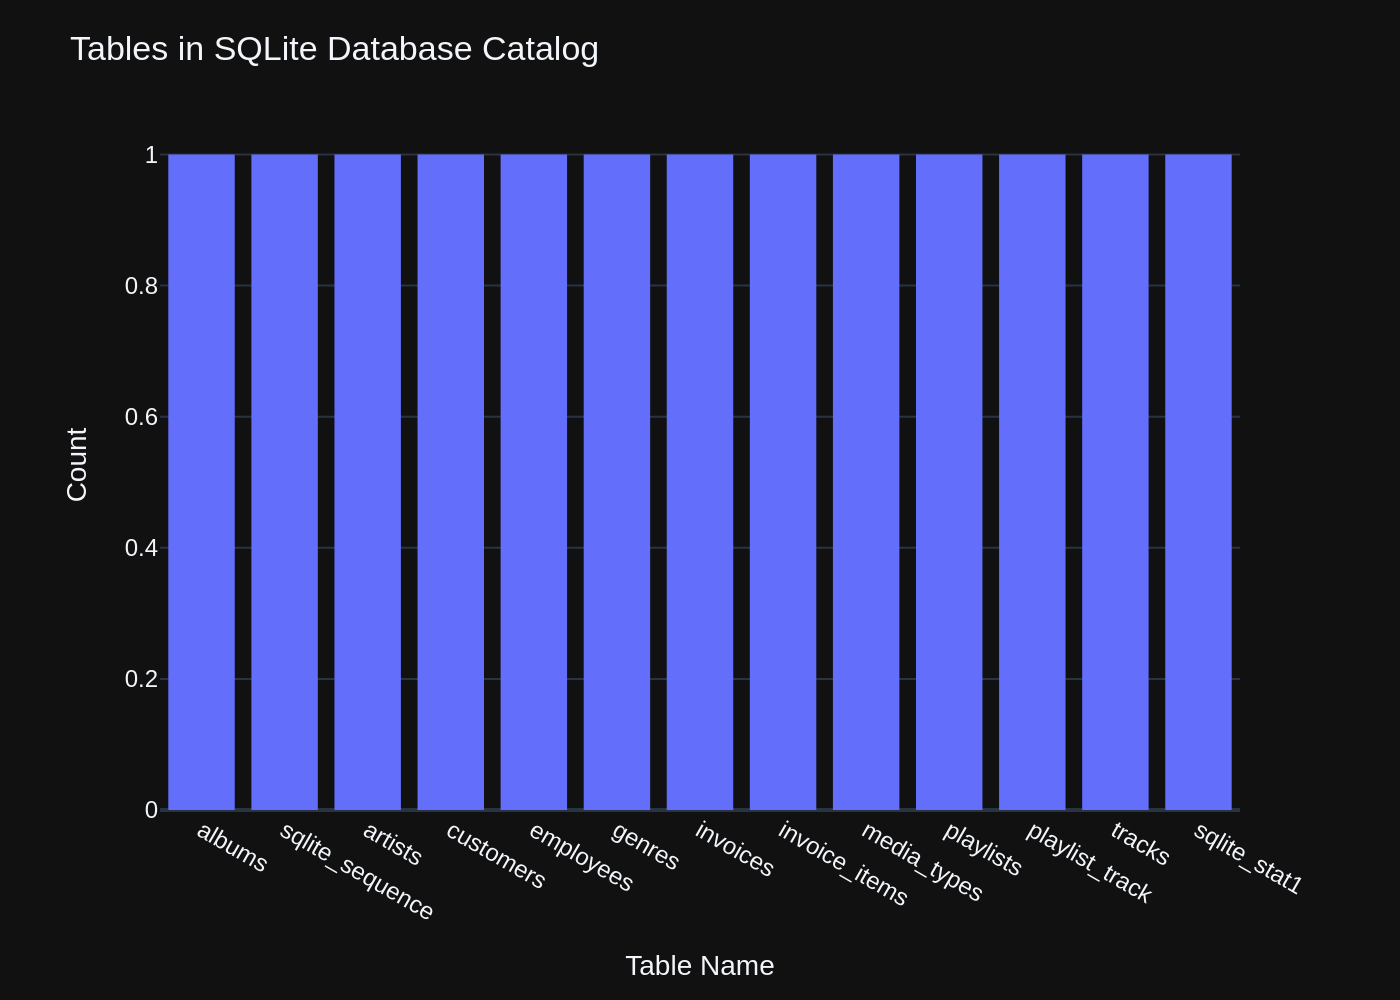





# QUESTION  - 3:  which table stores customer's orders



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT name FROM sqlite_master WHERE type='table' AND name LIKE 'invoices%'


[( <DataFrame> )]
queried dataframe



,name
0,invoices



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go
from plotly.subplots import make_subplots

def plot_results(df):
    if len(df) == 1:
        fig = go.Figure(data=[go.Indicator(
            mode = "number+gauge",
            value=df['name'].iloc[0],
            title_text=df['name'].iloc[0]
            )])
    else:
        fig = make_subplots(rows=len(df), cols=1, subplot_titles=df['name'].tolist())
        
        for i in range(len(df)):
            fig.add_trace(go.Bar(x=[df['name'].iloc[i]], y=[1]), row=i+1, col=1)
    
    return fig

plot_results(df).show()

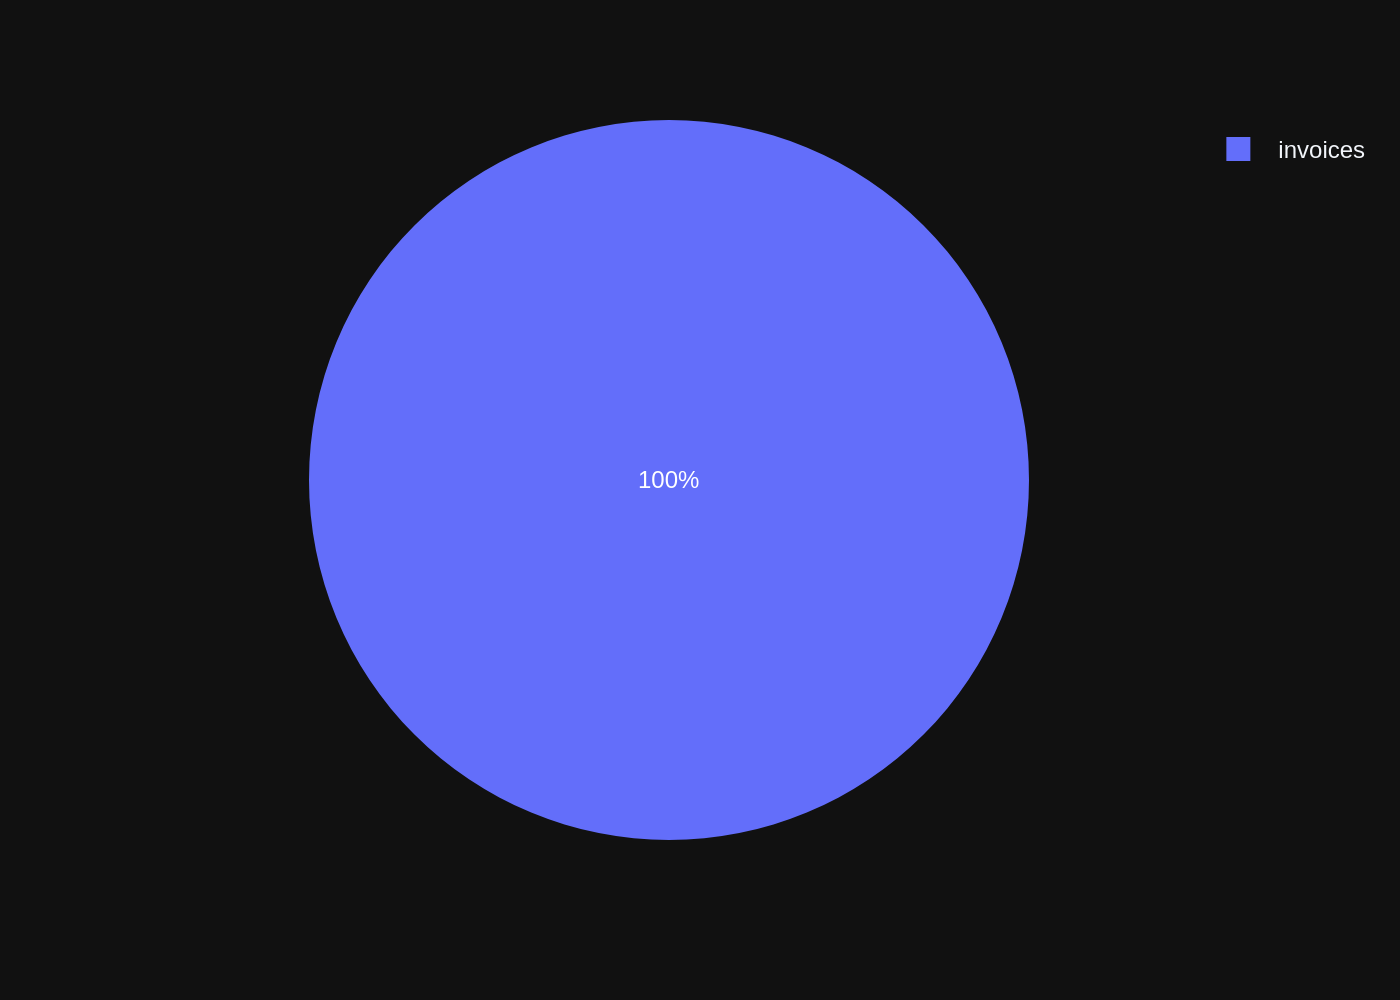





# QUESTION  - 4:  How many customers are there



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT COUNT(CustomerId) FROM customers


[( <DataFrame> )]
queried dataframe



,COUNT(CustomerId)
0,59



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

if df.shape[0] == 1:
    fig = go.Figure(data=[go.Indicator(
        title = {'text': 'Customer Count'},
        mode = 'number+gauge',
        value = df['COUNT(CustomerId)'].values[0])])
else:
    fig = go.Figure([go.Bar(x=['Customer Count'], y=df['COUNT(CustomerId)'])])

fig.update_layout(title='Number of Customers', xaxis_title='', yaxis_title='')

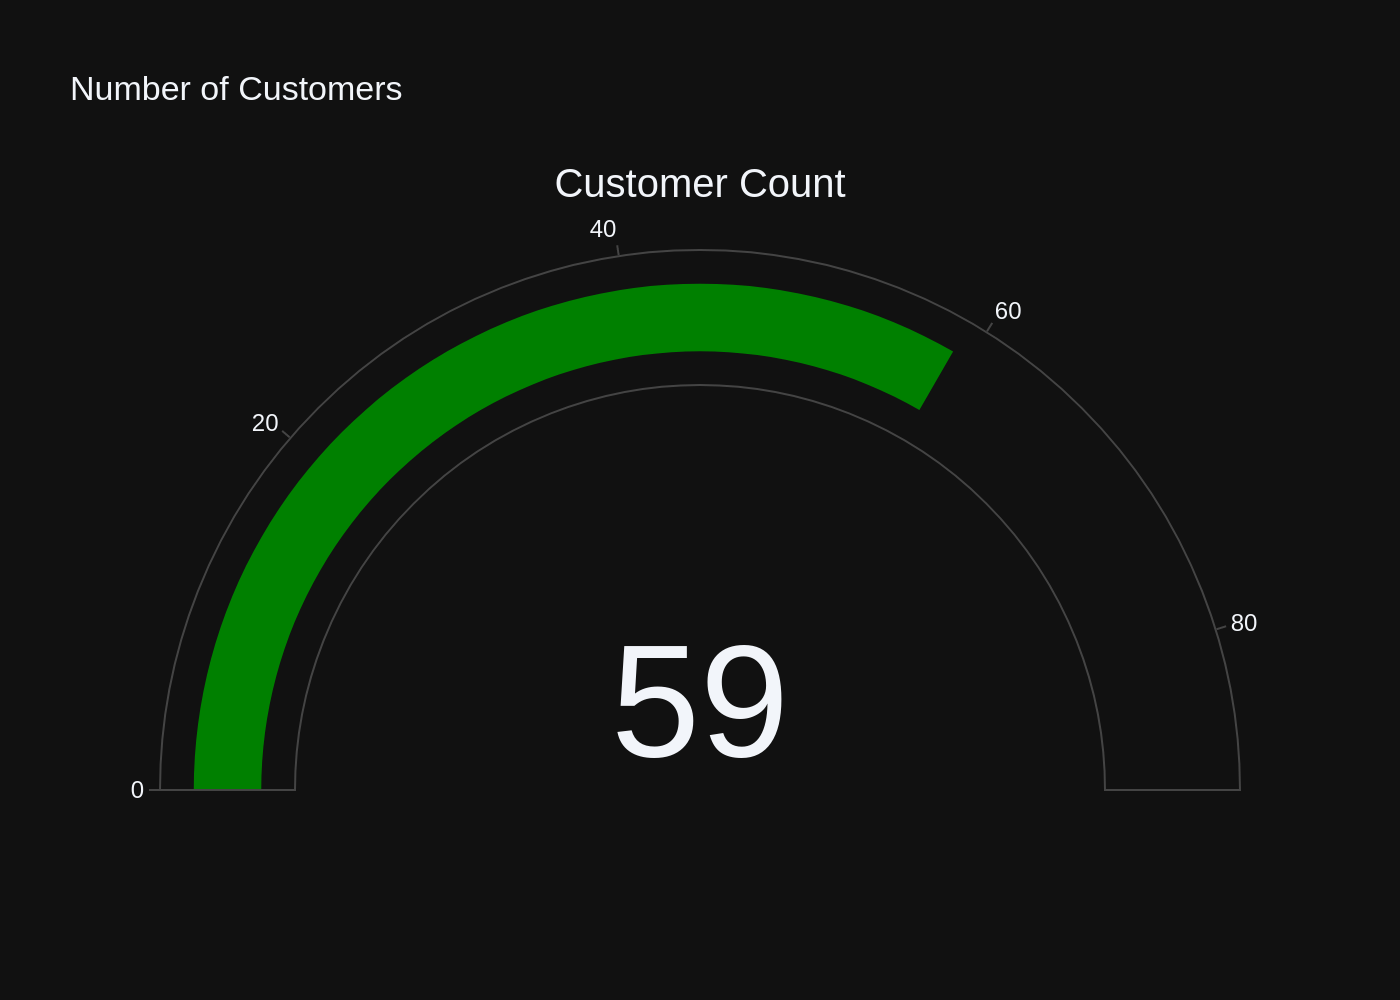





# QUESTION  - 5:  what are the top 5 countries that customers come from?



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Country, COUNT(CustomerId) as 'Customer Count' FROM customers GROUP BY Country ORDER BY `Customer Count` DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,Country,Customer Count
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='Country', y='Customer Count')
if len(df) == 1:
    fig.update_layout(title_text='Indicator: Top Country by Customer Count',
                       xaxis_title='',
                       yaxis_title='')
else:
    fig.update_layout(title_text='Top Countries by Customer Count')

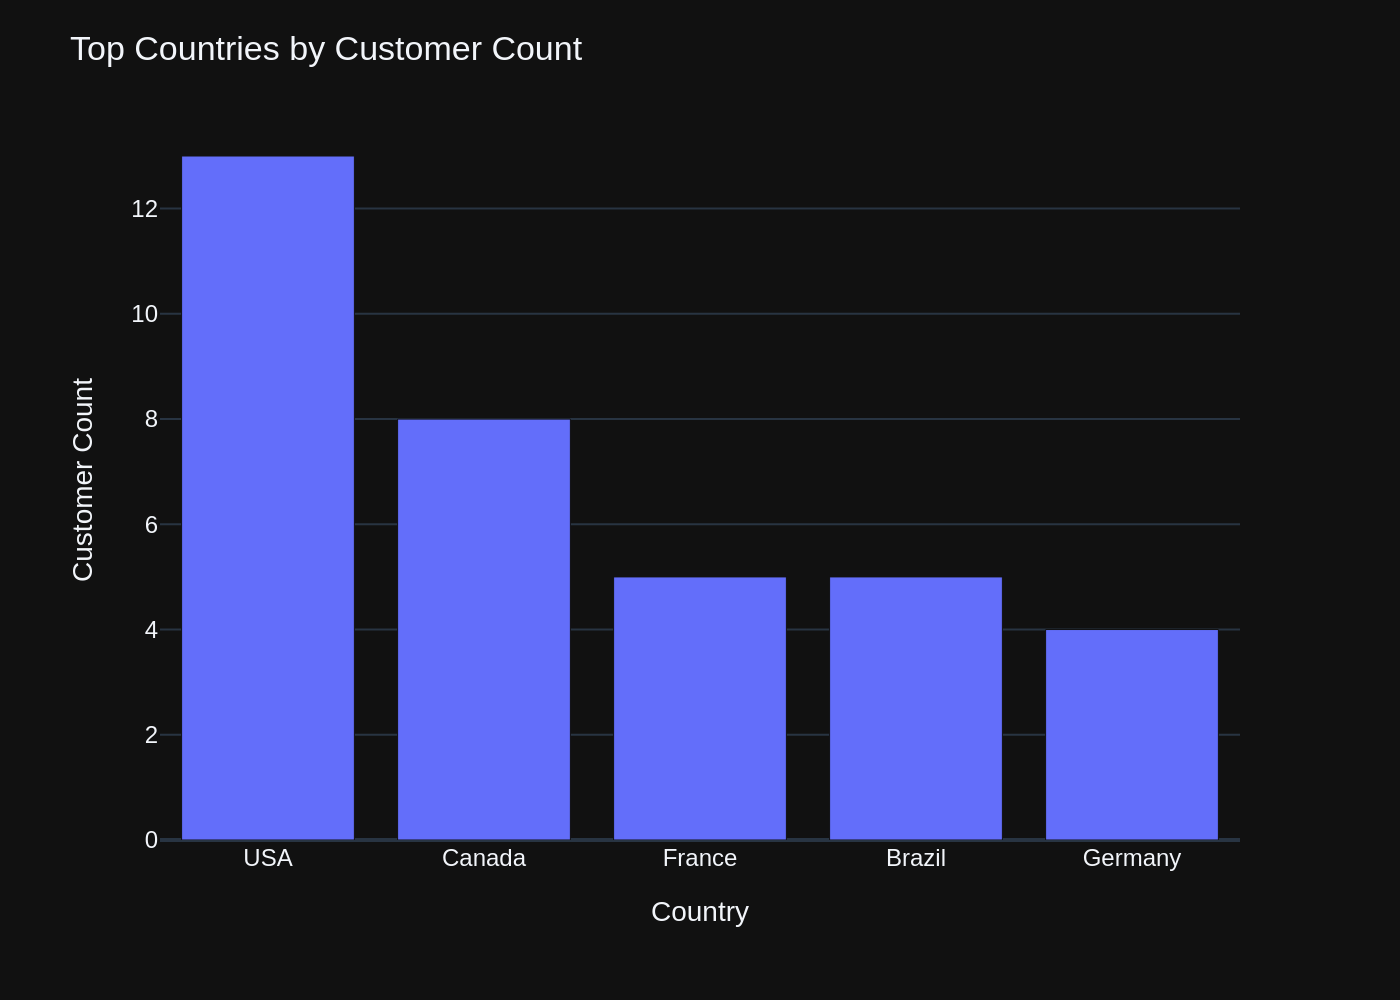





# QUESTION  - 6:  List all albums and their corresponding artist names  



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT DISTINCT T1.Title, T2.Name 
FROM albums AS T1
JOIN artists AS T2 ON T1.ArtistId = T2.ArtistId


[( <DataFrame> )]
queried dataframe



,Title,Name
0,For Those About To Rock We Salute You,AC/DC
1,Balls to the Wall,Accept
2,Restless and Wild,Accept
3,Let There Be Rock,AC/DC
4,Big Ones,Aerosmith
5,Jagged Little Pill,Alanis Morissette
6,Facelift,Alice In Chains
7,Warner 25 Anos,Antônio Carlos Jobim
8,Plays Metallica By Four Cellos,Apocalyptica
9,Audioslave,Audioslave



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='Title', y='Name')
fig.update_layout(title='Albums and Artists', xaxis_title='Album Titles', yaxis_title='Artist Names')

if df['Name'].nunique() == 1:
    fig.update_yaxes(visible=False)

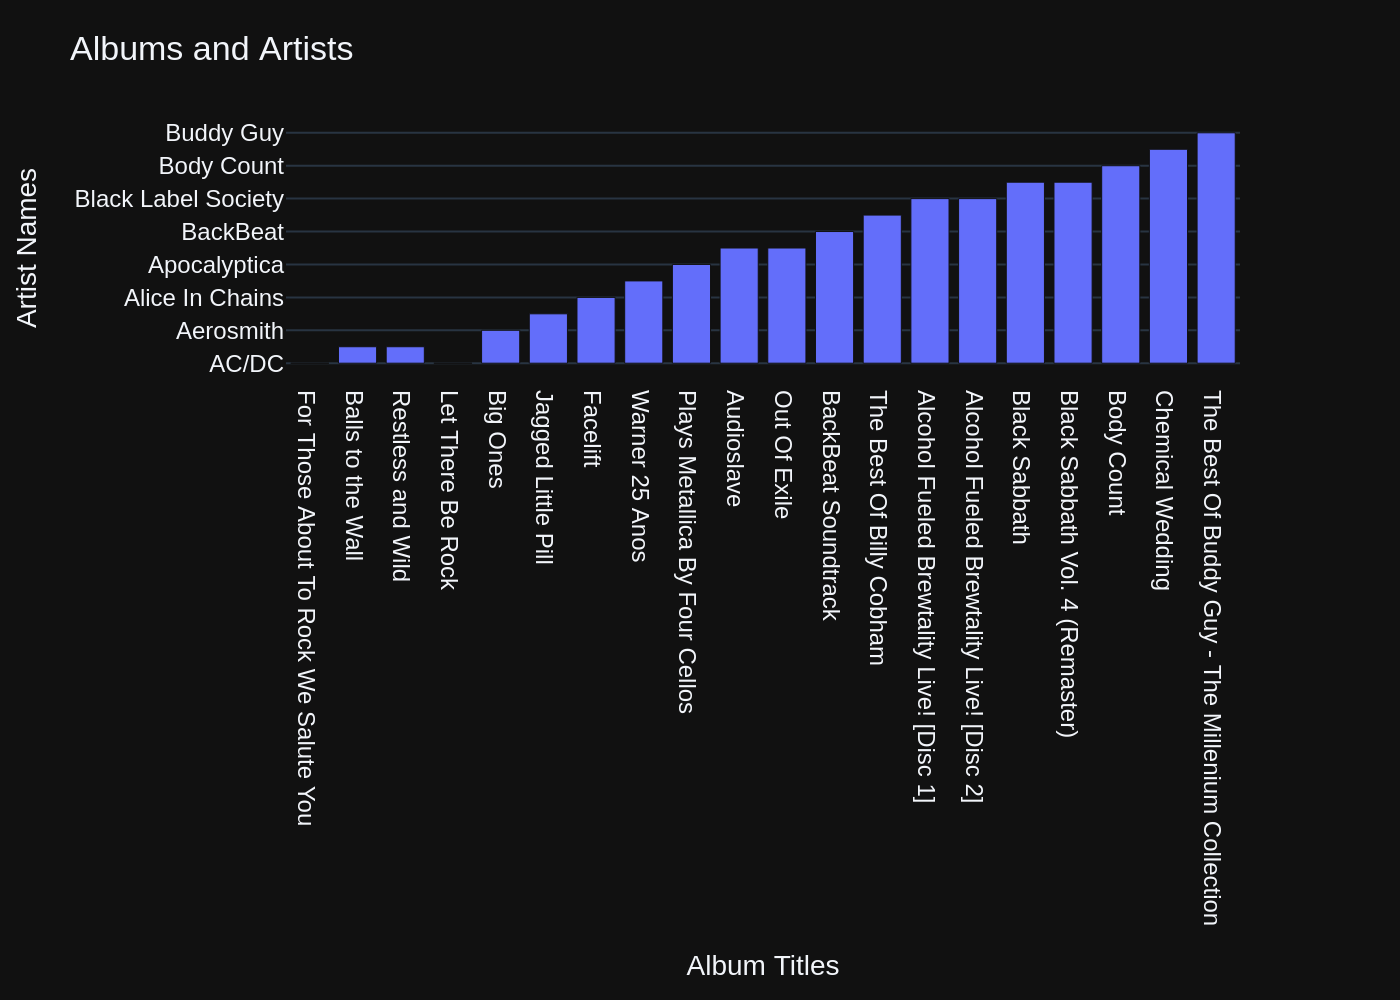





# QUESTION  - 7:  Find all tracks with a name containing "What" (case-insensitive) 



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT TrackId, Name 
FROM tracks 
WHERE Name LIKE '%what%' COLLATE NOCASE LIMIT 20


[( <DataFrame> )]
queried dataframe



,TrackId,Name
0,26,What It Takes
1,88,What You Are
2,130,Do what cha wanna
3,342,What is and Should Never Be
4,607,So What
5,960,What A Day
6,1000,What If I Do?
7,1039,What Now My Love
8,1145,Whatsername
9,1440,"Whatever It Is, I Just Can't Stop"



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='TrackId', y='Name')

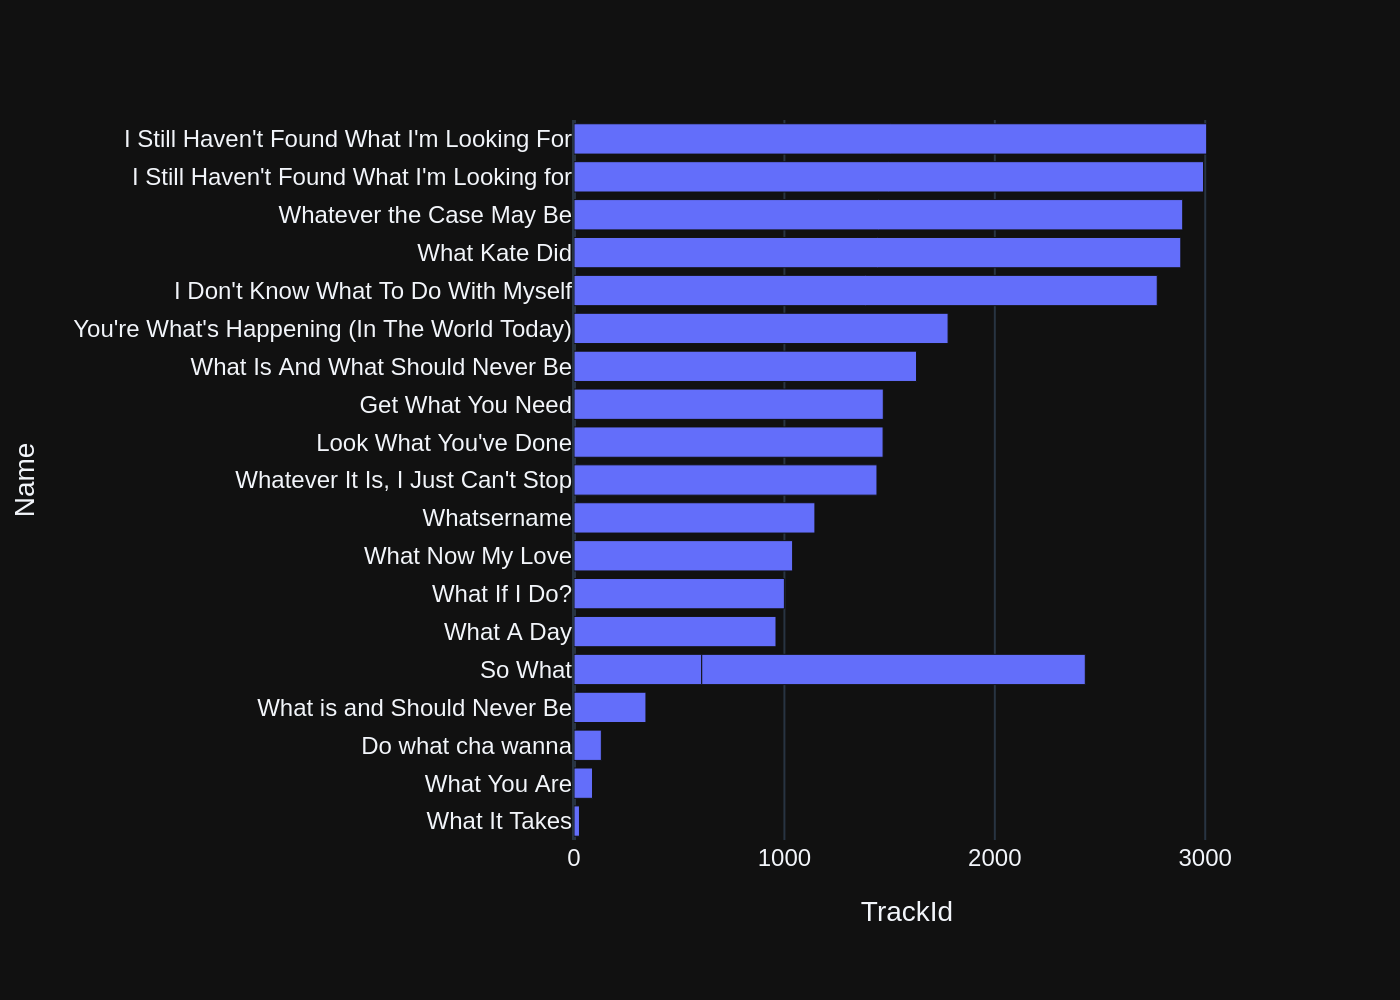





# QUESTION  - 8:  Get the total number of invoices for each customer



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT CustomerId, COUNT(InvoiceId) as 'Total Invoices' 
FROM invoices 
GROUP BY CustomerId ORDER BY `Total Invoices` DESC LIMIT 20


[( <DataFrame> )]
queried dataframe



,CustomerId,Total Invoices
0,1,7
1,2,7
2,3,7
3,4,7
4,5,7
5,6,7
6,7,7
7,8,7
8,9,7
9,10,7



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.bar(x=df['CustomerId'], y=df['Total Invoices'], title='Total Number of Invoices')
else:
    fig = px.bar(df, x='CustomerID', y='Total Invoices', title='Total Number of Invoices')

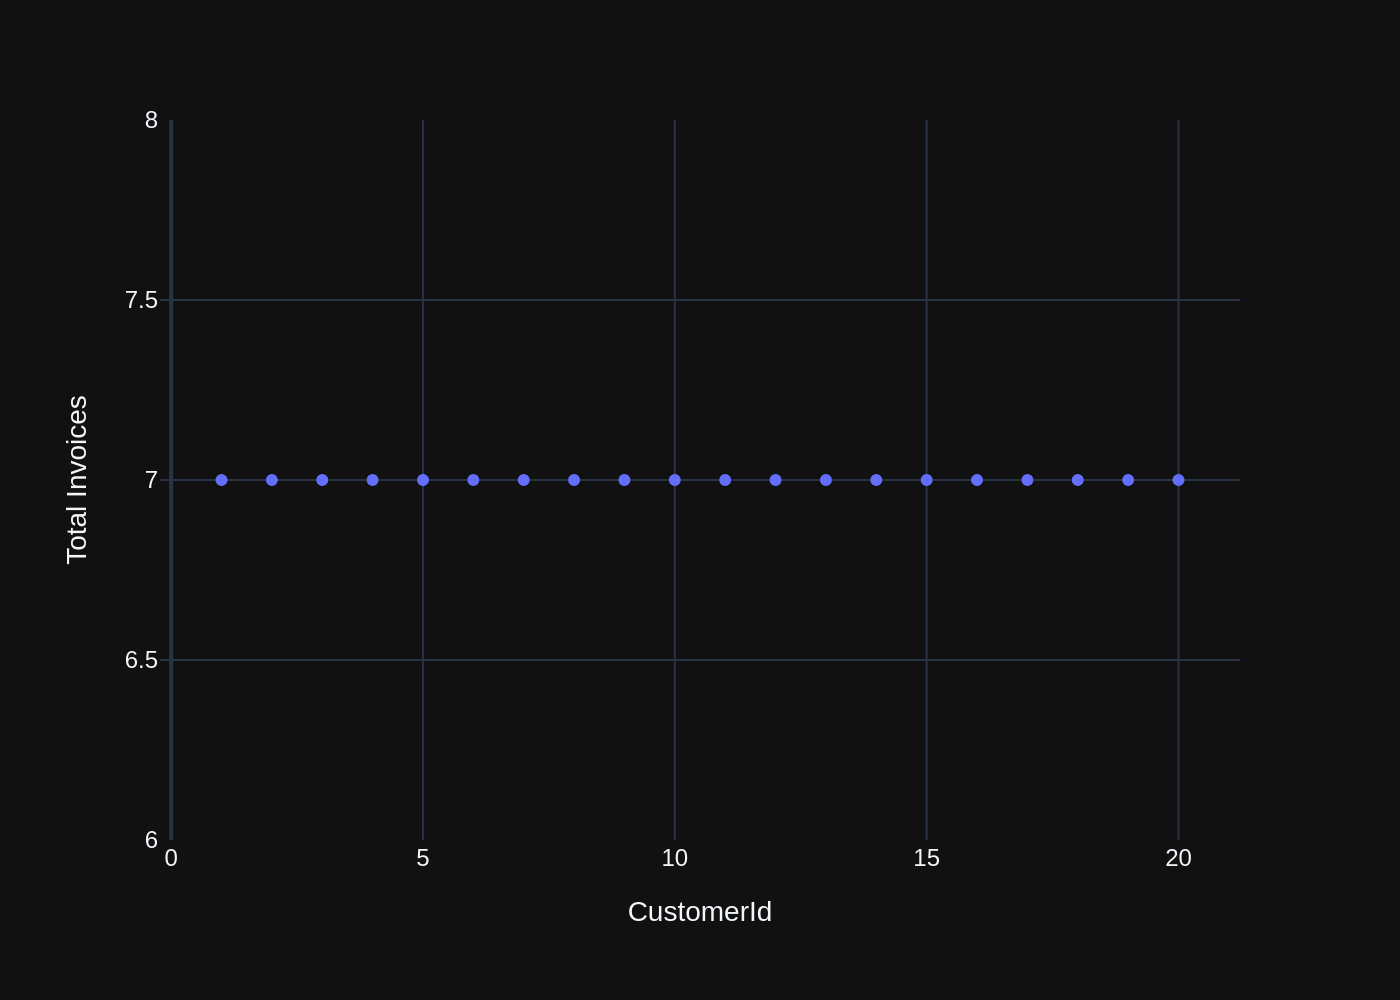





# QUESTION  - 9:  Find the total number of invoices per country



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT BillingCountry, COUNT(Invoices.InvoiceId) as 'Total Invoices'
FROM invoices 
GROUP BY BillingCountry ORDER BY `Total Invoices` DESC LIMIT 20


[( <DataFrame> )]
queried dataframe



,BillingCountry,Total Invoices
0,USA,91
1,Canada,56
2,France,35
3,Brazil,35
4,Germany,28
5,United Kingdom,21
6,Portugal,14
7,Czech Republic,14
8,India,13
9,Sweden,7



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.bar(x=df['BillingCountry'], y=df['Total Invoices'])
else:
    fig = px.bar(df, x='BillingCountry', y='Total Invoices', color_discrete_sequence=['#3498db'])

fig.update_layout(
    title_text="Total Number of Invoices per Country",
    xaxis_title_text="Country",
    yaxis_title_text="Number of Invoices"
)

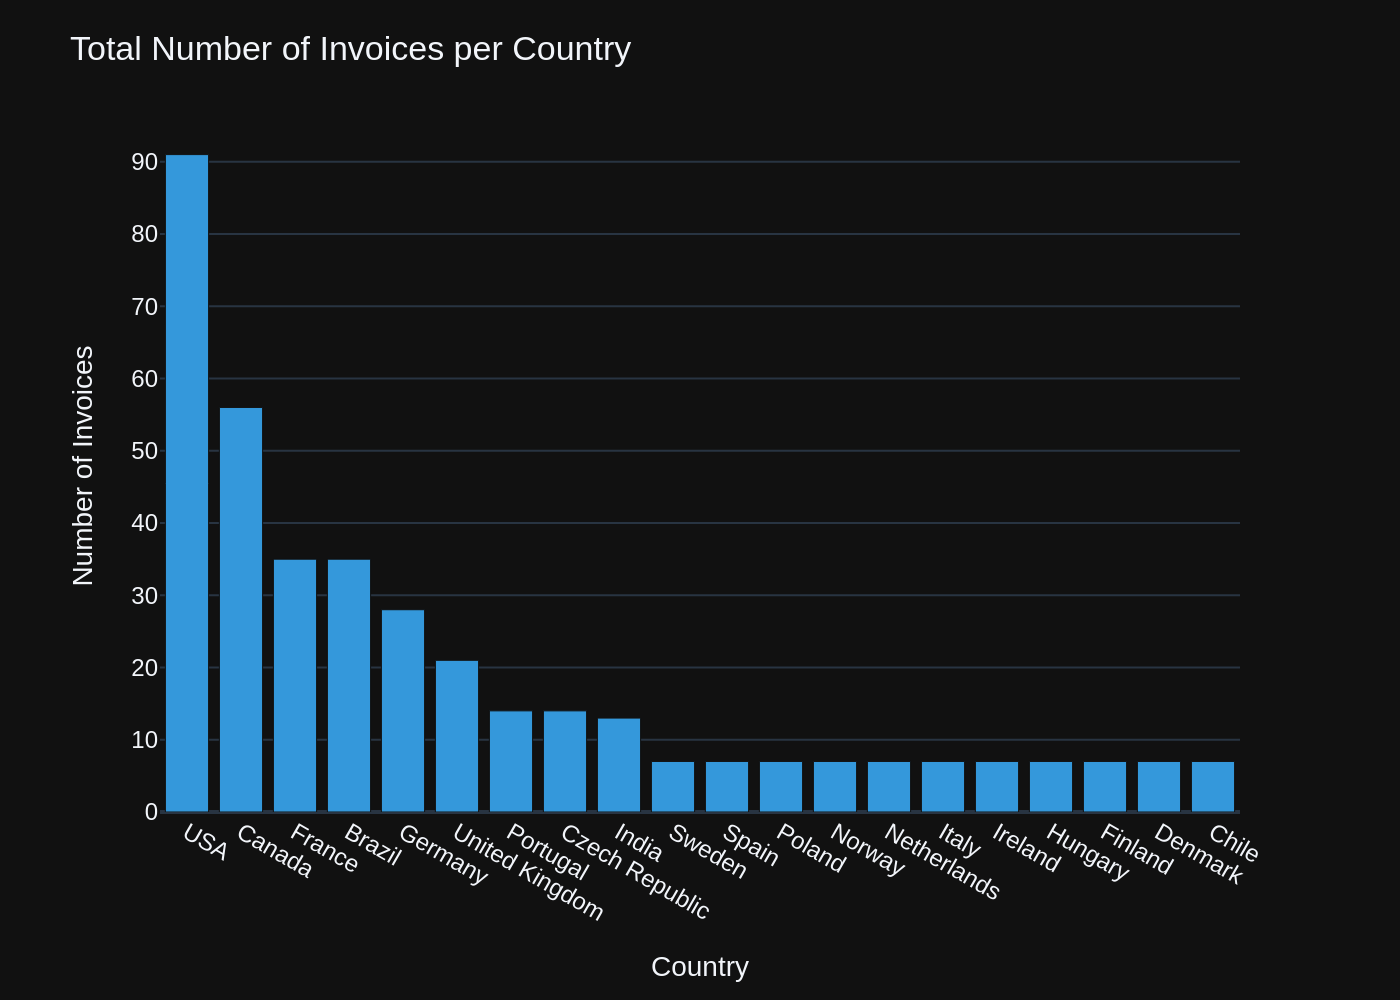





# QUESTION  - 10:  List all invoices with a total exceeding $10



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT InvoiceId, Total
FROM invoices
WHERE Total > 10.00 LIMIT 20


[( <DataFrame> )]
queried dataframe



,InvoiceId,Total
0,5,13.86
1,12,13.86
2,19,13.86
3,26,13.86
4,33,13.86
5,40,13.86
6,47,13.86
7,54,13.86
8,61,13.86
9,68,13.86



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='InvoiceId', y='Total')
fig.update_layout(title='Invoices Totaling Over $10',
                  xaxis_title='Invoice ID',
                  yaxis_title='Total Amount')

# If only one value in the dataframe
if len(df) == 1:
    fig = px.bar(x=[1], y=df['Total'].tolist())
    fig.update_layout(title='Single Invoice Totaling Over $10',
                      xaxis_title='Invoice ID',
                      yaxis_title='Total Amount')

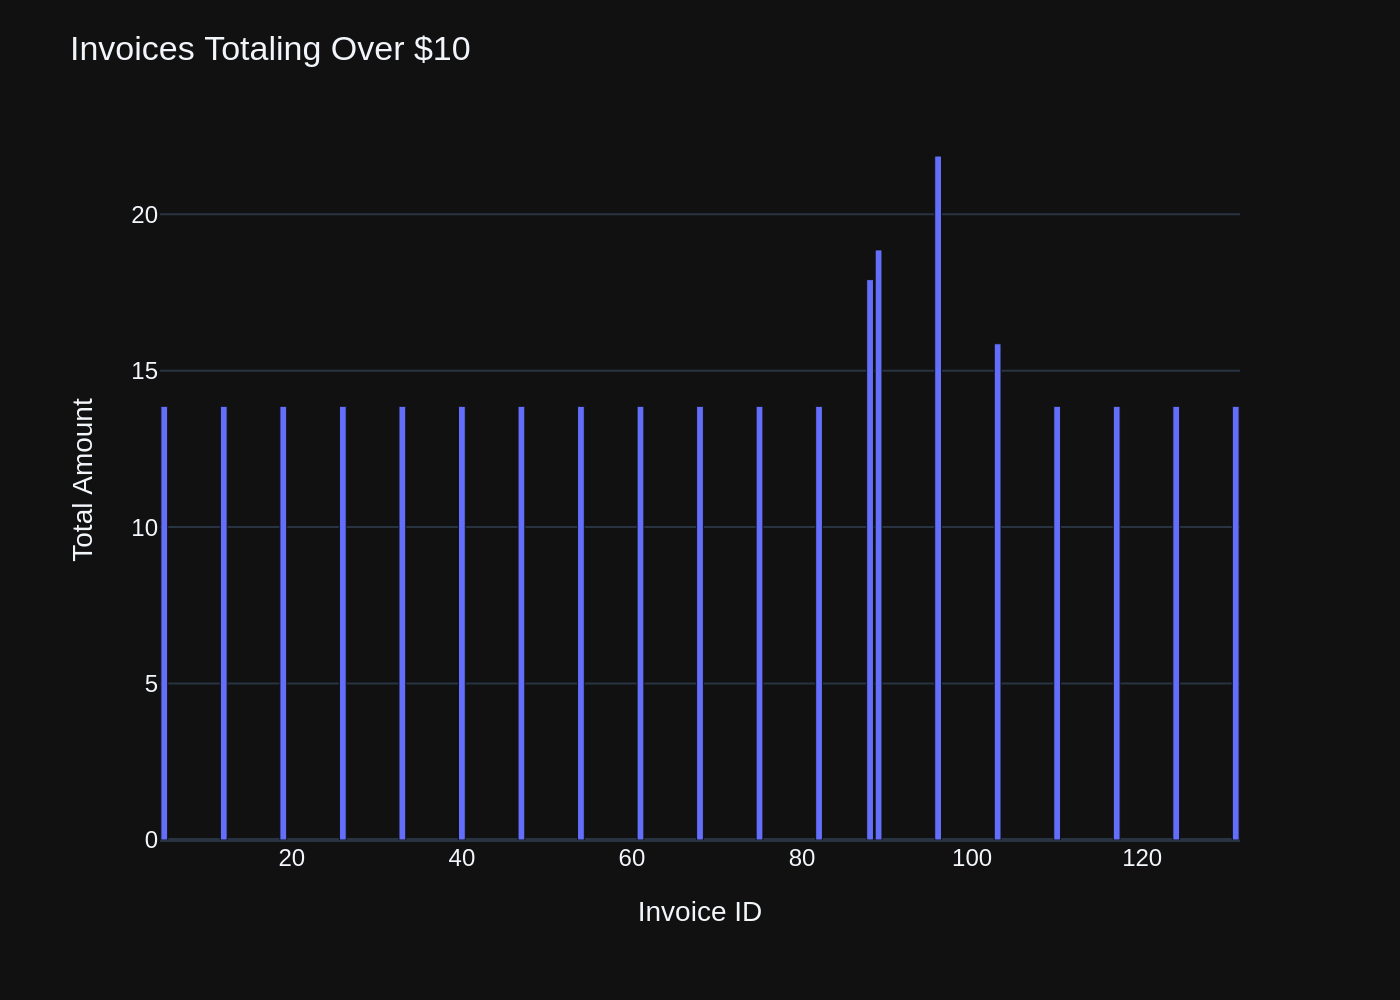





# QUESTION  - 11:  Find all invoices since 2010 and the total amount invoiced:



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT InvoiceDate, Total 
FROM invoices 
WHERE strftime('%Y', InvoiceDate) > '2010' LIMIT 20


[( <DataFrame> )]
queried dataframe



,InvoiceDate,Total
0,2011-01-02 00:00:00,0.99
1,2011-01-15 00:00:00,1.98
2,2011-01-15 00:00:00,1.98
3,2011-01-16 00:00:00,3.96
4,2011-01-17 00:00:00,5.94
5,2011-01-20 00:00:00,8.91
6,2011-01-25 00:00:00,13.86
7,2011-02-02 00:00:00,0.99
8,2011-02-15 00:00:00,1.98
9,2011-02-15 00:00:00,1.98



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.bar(x=df['InvoiceDate'], y=df['Total'])
else:
    fig = px.scatter(df, x='InvoiceDate', y='Total')

fig.update_layout(title='Total Amount Invoiced Since 2010',
                  xaxis_title='Year',
                  yaxis_title='Amount')

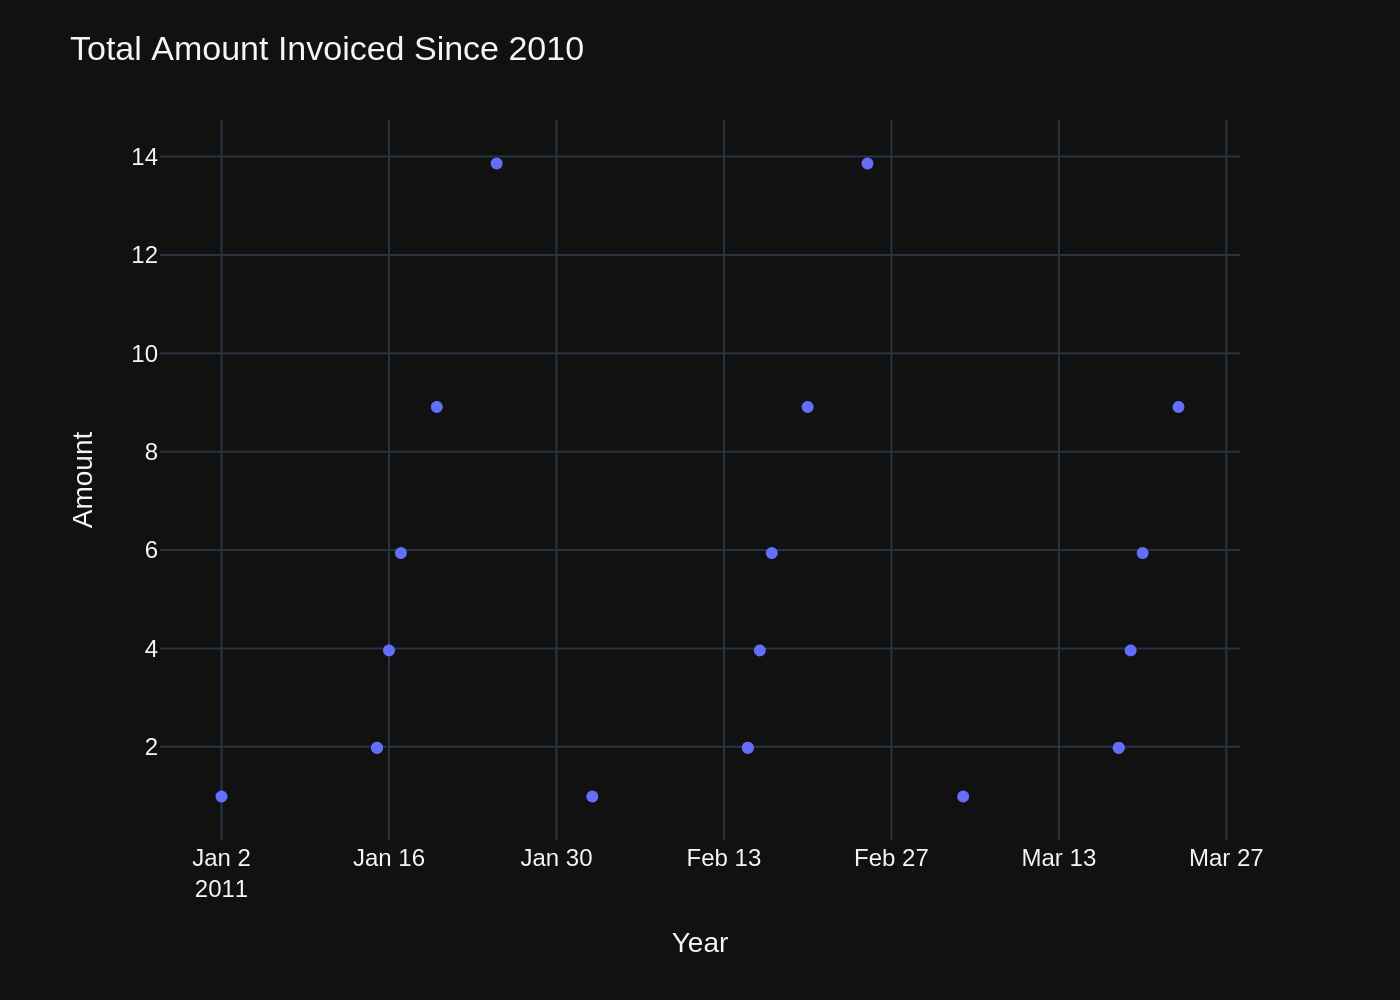





# QUESTION  - 12:  List all employees and their reporting manager's name (if any):



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T1.FirstName, T1.LastName, COALESCE(T2.FirstName, 'No Manager') as 'Reporting Manager'
FROM employees AS T1
LEFT JOIN employees AS T2 ON T1.ReportsTo = T2.EmployeeId LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName,Reporting Manager
0,Andrew,Adams,No Manager
1,Nancy,Edwards,Andrew
2,Jane,Peacock,Nancy
3,Margaret,Park,Nancy
4,Steve,Johnson,Nancy
5,Michael,Mitchell,Andrew
6,Robert,King,Michael
7,Laura,Callahan,Michael



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='FirstName', y=['Reporting Manager'])
fig.update_layout(title='Employee Reporting Structure',
                  xaxis_title='Employee First Name',
                  yaxis_title='Reporting Manager')
if len(set(df['Reporting Manager'])) == 1:
    fig.update_yaxes(type='category')

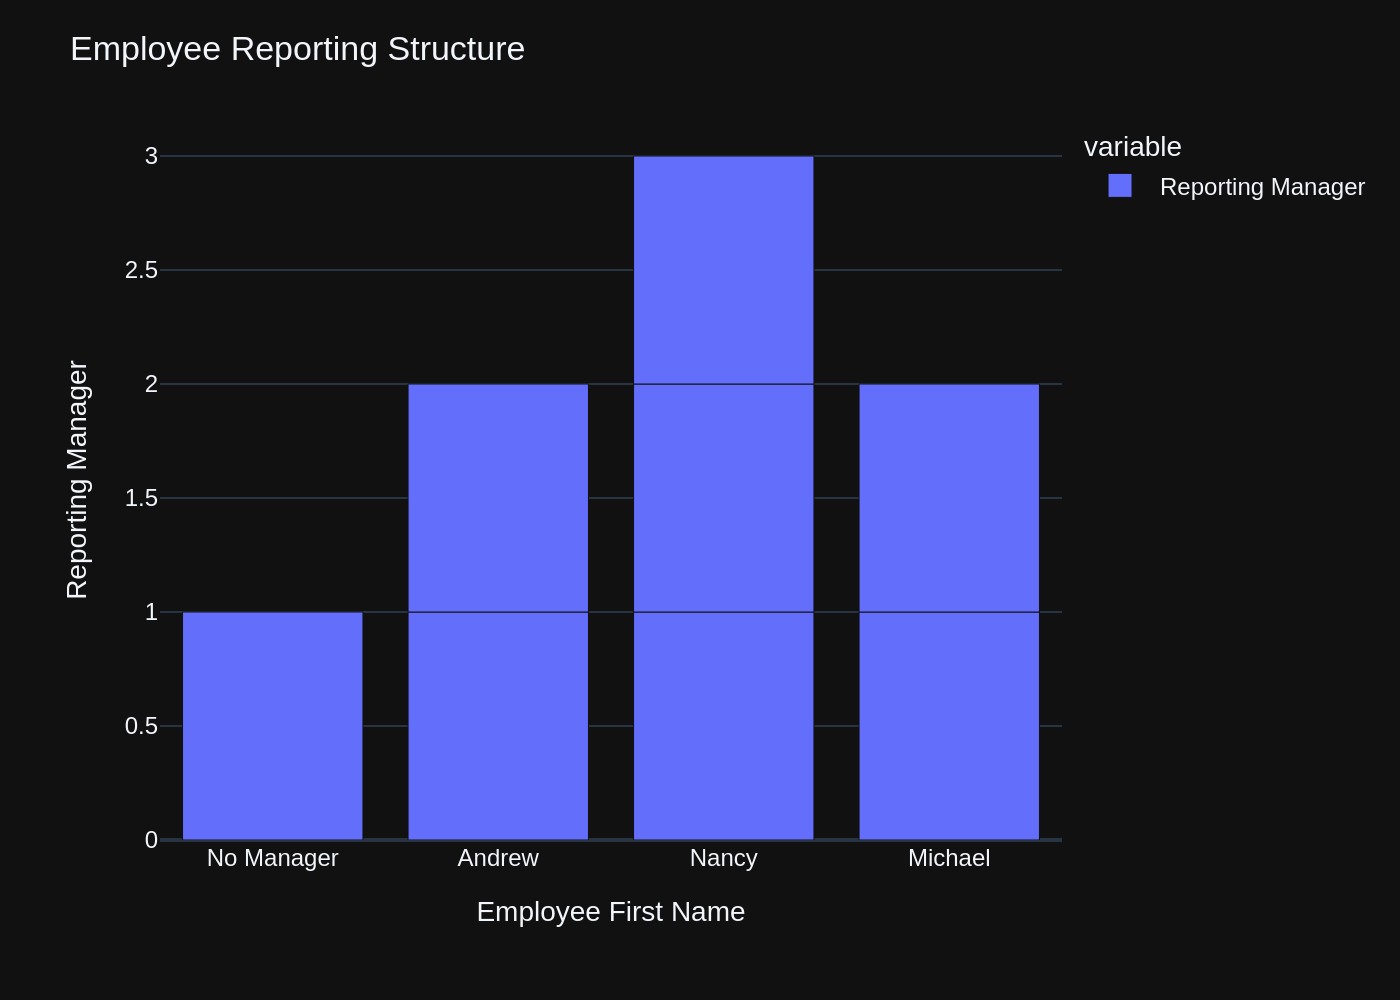





# QUESTION  - 13:   Get the average invoice total for each customer:



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT CustomerId, AVG(Total) as 'Average Invoice Total' FROM invoices GROUP BY CustomerId


[( <DataFrame> )]
queried dataframe



,CustomerId,Average Invoice Total
0,1,5.660000
1,2,5.374286
2,3,5.660000
3,4,5.660000
4,5,5.802857
5,6,7.088571
6,7,6.088571
7,8,5.374286
8,9,5.374286
9,10,5.374286



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='CustomerId', y='Average Invoice Total')
if len(df) == 1:
    fig.update_layout(
        title="Indicator",
        annotations=[
            dict(text="Total: {:.2f}".format(df['Average Invoice Total'].iloc[0]), x=0.5, y=df['Average Invoice Total'].iloc[0], showarrow=False)
        ]
    )
else:
    fig.update_layout(title="Average Invoice Total by Customer")

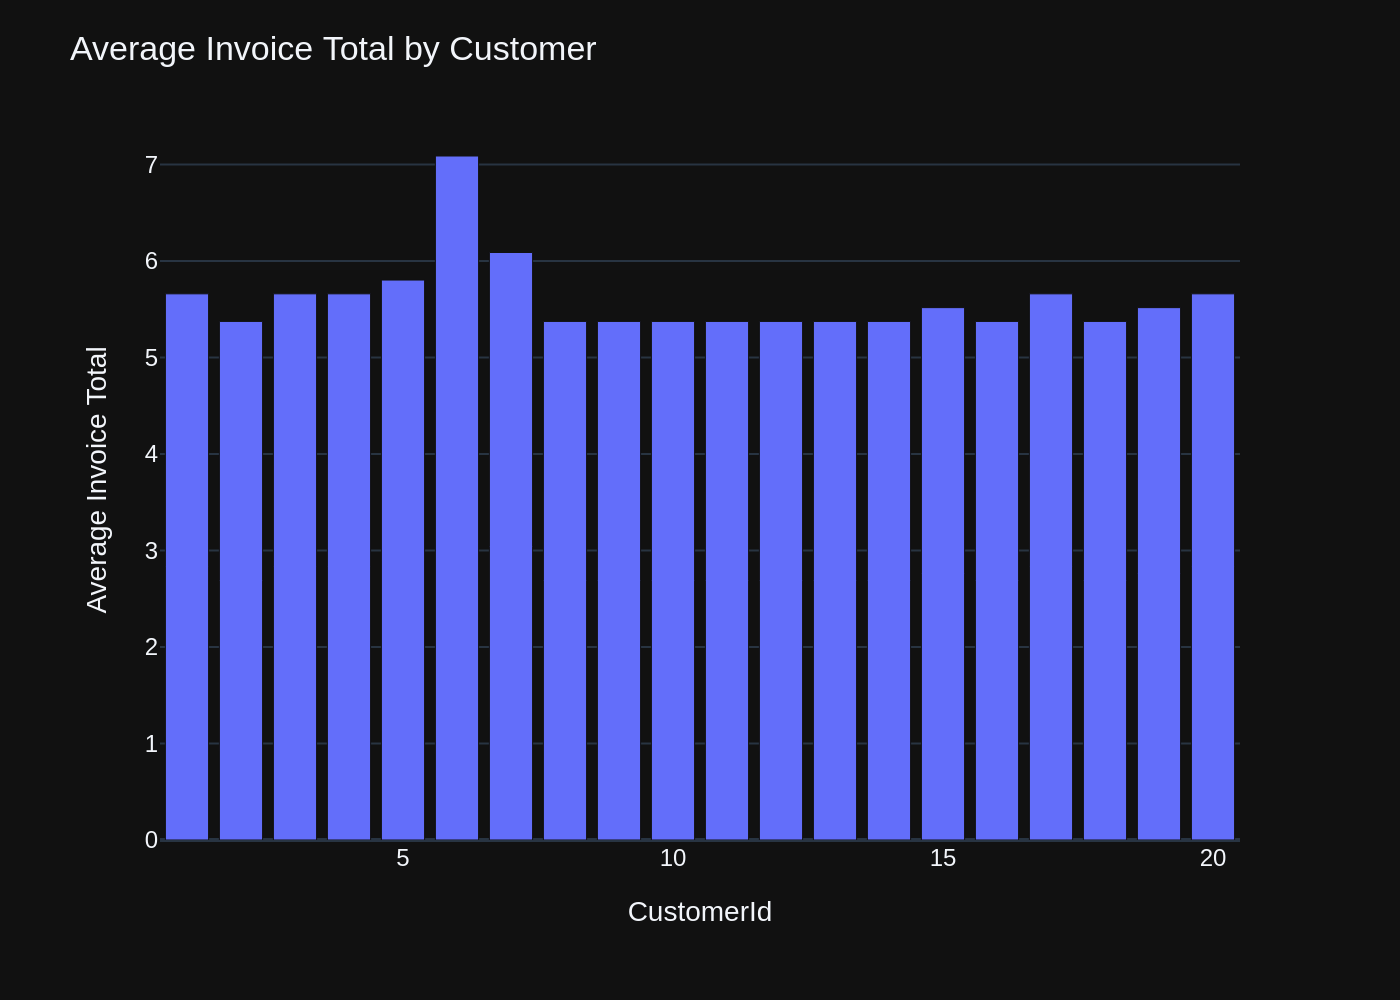





# QUESTION  - 14:  Find the top 5 most expensive tracks (based on unit price):



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT TrackId, UnitPrice 
FROM tracks 
ORDER BY UnitPrice DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,TrackId,UnitPrice
0,2819,1.99
1,2820,1.99
2,2821,1.99
3,2822,1.99
4,2823,1.99



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.graph_objects as go

fig = go.Figure(data=[go.Scatter(x=df['TrackId'], y=df['UnitPrice'])])
if df.shape[0] > 1:
    fig.update_layout(title='Top 5 Most Expensive Tracks', xaxis_title='Track ID', yaxis_title='Unit Price')
else:
    fig.update_layout(title='Single Most Expensive Track')

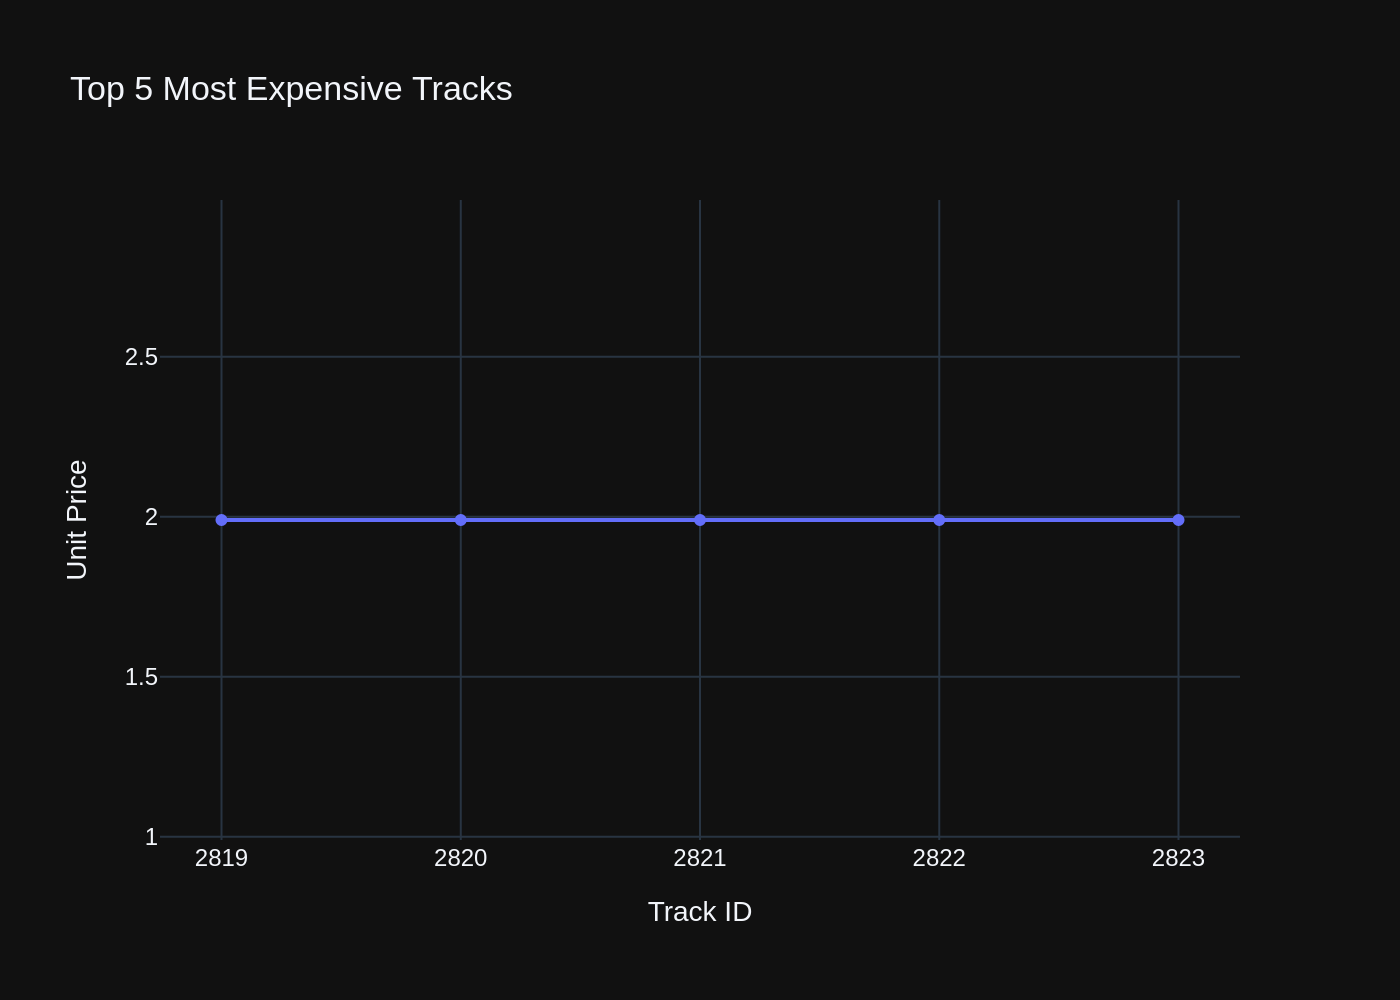





# QUESTION  - 15:  List all genres and the number of tracks in each genre:



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T2.Name, COUNT(T1.TrackId) as 'Track Count' 
FROM tracks AS T1
JOIN genres AS T2 ON T1.GenreId = T2.GenreId 
GROUP BY T2.Name LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name,Track Count
0,Alternative,40
1,Alternative & Punk,332
2,Blues,81
3,Bossa Nova,15
4,Classical,74
5,Comedy,17
6,Drama,64
7,Easy Listening,24
8,Electronica/Dance,30
9,Heavy Metal,28



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.bar(x=df['Name'], y=df['Track Count'])
else:
    fig = px.bar(df, x='Name', y='Track Count')

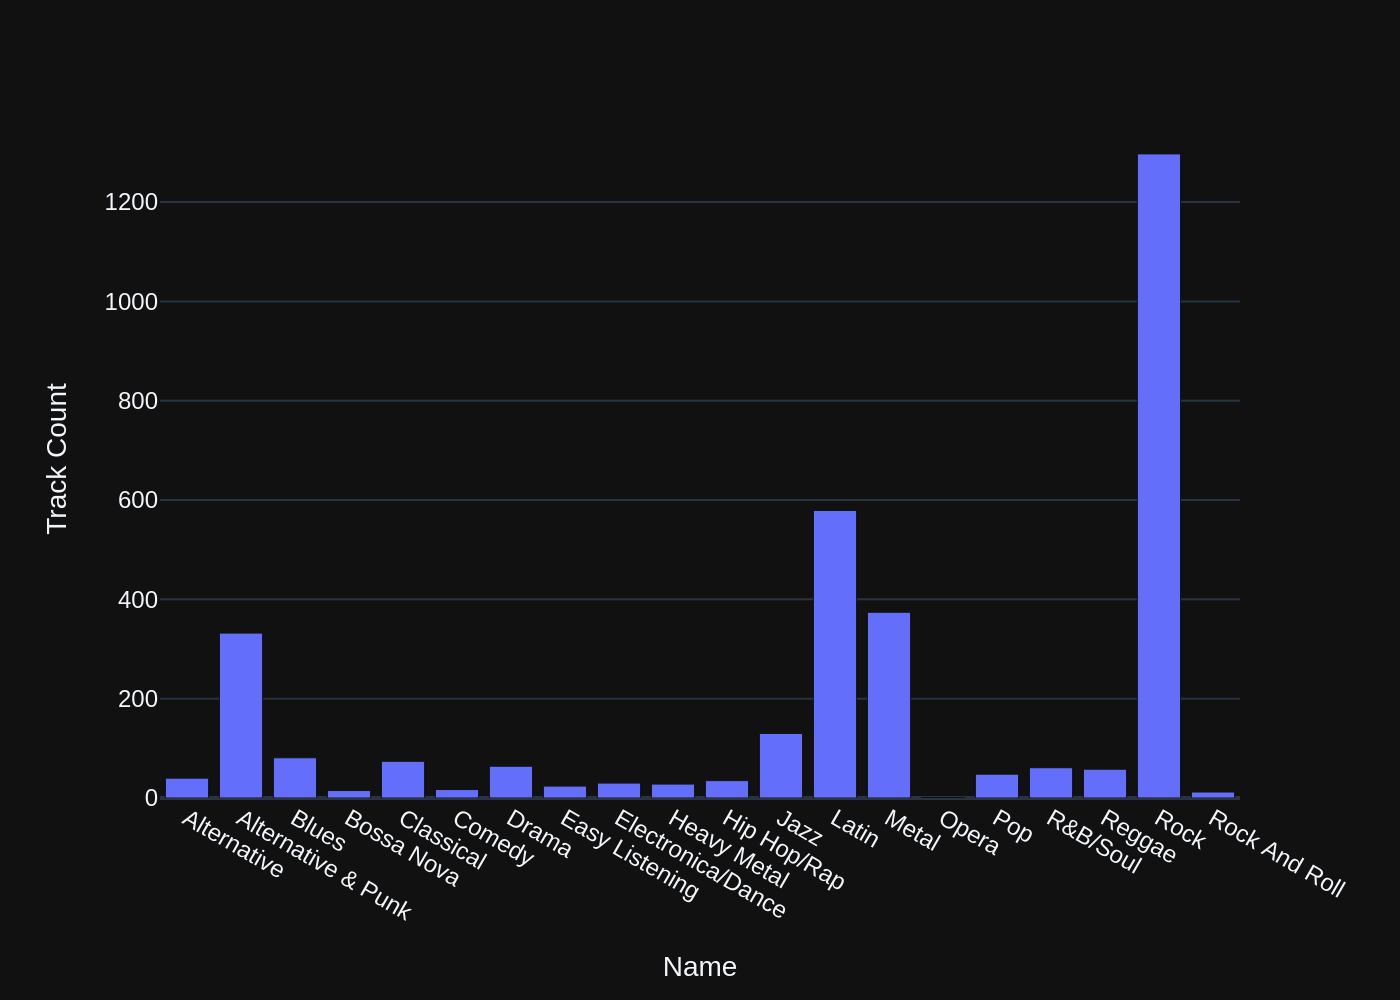





# QUESTION  - 16:  Get all genres that do not have any tracks associated with them:



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Name 
FROM genres 
WHERE GenreId NOT IN ( SELECT GenreId FROM tracks ) LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 1 *****


Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT Name FROM genres 
WHERE GenreId NOT IN (SELECT GenreId FROM tracks)
```

However, if the provided tables are exactly as specified in your original message, this approach will not work. The reason is that SQLite does not support a direct `NOT IN` query with subqueries unless you have an index on both columns.

A better way to write this SQL would be:

```sql
SELECT T1.Name 
FROM genres AS T1
LEFT JOIN tracks AS T2 ON T1.GenreId = T2.GenreId 
WHERE T2.TrackId IS NULL



[( <SQL> )]
generated SQL statement



SELECT Name FROM genres 
WHERE GenreId NOT IN (SELECT GenreId FROM tracks)
```

However, if the provided tables are exactly as specified in your original message, this approach will not work. The reason is that SQLite does not support a direct `NOT IN` query with subqueries unless you have an index on both columns.

A better way to write this SQL would be:

```sql
SELECT T1.Name 
FROM genres AS T1
LEFT JOIN tracks AS T2 ON T1.GenreId = T2.GenreId 
WHERE T2.TrackId IS NULL


[( RETRY )]
***** 2 *****


Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT Name 
FROM genres 
WHERE GenreId NOT IN (SELECT DISTINCT GenreId FROM tracks)



[( <SQL> )]
generated SQL statement



SELECT Name 
FROM genres 
WHERE GenreId NOT IN (SELECT DISTINCT GenreId FROM tracks)


[( <DataFrame> )]
queried dataframe



,Name



[( RETRY )]
***** 3 *****


Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None





# QUESTION  - 17:  List all customers who have not placed any orders:



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT FirstName, LastName FROM customers WHERE CustomerId NOT IN ( SELECT CustomerId FROM invoices ) LIMIT 20


[( <DataFrame> )]
queried dataframe



,FirstName,LastName



[( RETRY )]
***** 1 *****


Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
with no invoices associated with them.

Here's the corrected SQL statement:

```sql
SELECT FirstName, LastName 
FROM customers 
WHERE CustomerId NOT IN (SELECT DISTINCT CustomerId FROM invoices);


[( <SQL> )]
generated SQL statement



with no invoices associated with them.

Here's the corrected SQL statement:

```sql
SELECT FirstName, LastName 
FROM customers 
WHERE CustomerId NOT IN (SELECT DISTINCT CustomerId FROM invoices);


[( RETRY )]
***** 2 *****


Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 3 *****


Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT DISTINCT C.*
FROM customers AS C
LEFT JOIN invoices AS I ON C.CustomerId = I.CustomerId
WHERE I.InvoiceId IS NULL;


[( <SQL> )]
generated SQL statement



SELECT DISTINCT C.*
FROM customers AS C
LEFT JOIN invoices AS I ON C.CustomerId = I.CustomerId
WHERE I.InvoiceId IS NULL;


[( <DataFrame> )]
queried dataframe



,CustomerId,FirstName,LastName,Company,Address,City,State,Country,PostalCode,Phone,Fax,Email,SupportRepId






# QUESTION  - 18:   
        Can you find the top 10 most popular artists based on the number of tracks?
        Hint: There are 3 tables - artists, albums and tracks, 
        where albums and artists are linked by ArtistId, albums and tracks are linked by AlbumId,
    



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T2.Name, COUNT(T1.TrackId) as 'Track Count' 
FROM tracks AS T1
JOIN albums AS T2 ON T1.AlbumId = T2.AlbumId 
GROUP BY T2.Name 
ORDER BY `Track Count` DESC LIMIT 10


[( RETRY )]
***** 1 *****


Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( EXTRACTED SQL )]
SELECT T3.Name, COUNT(T1.TrackId) as 'Track Count'
FROM tracks AS T1
JOIN albums AS T2 ON T1.AlbumId = T2.AlbumId
JOIN artists AS T3 ON T2.ArtistId = T3.ArtistId 
GROUP BY T3.Name ORDER BY `Track Count` DESC LIMIT 10



[( <SQL> )]
generated SQL statement



SELECT T3.Name, COUNT(T1.TrackId) as 'Track Count'
FROM tracks AS T1
JOIN albums AS T2 ON T1.AlbumId = T2.AlbumId
JOIN artists AS T3 ON T2.ArtistId = T3.ArtistId 
GROUP BY T3.Name ORDER BY `Track Count` DESC LIMIT 10


[( <DataFrame> )]
queried dataframe



,Name,Track Count
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Lost,92
5,Deep Purple,92
6,Pearl Jam,67
7,Lenny Kravitz,57
8,Various Artists,56
9,The Office,53



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.bar(x=df['Name'], y=df['Track Count'])
else:
    fig = px.bar(df, x='Name', y='Track Count')

fig.update_layout(title="Top 10 Most Popular Artists by Track Count",
                   xaxis_title="Artist Name",
                   yaxis_title="Number of Tracks")

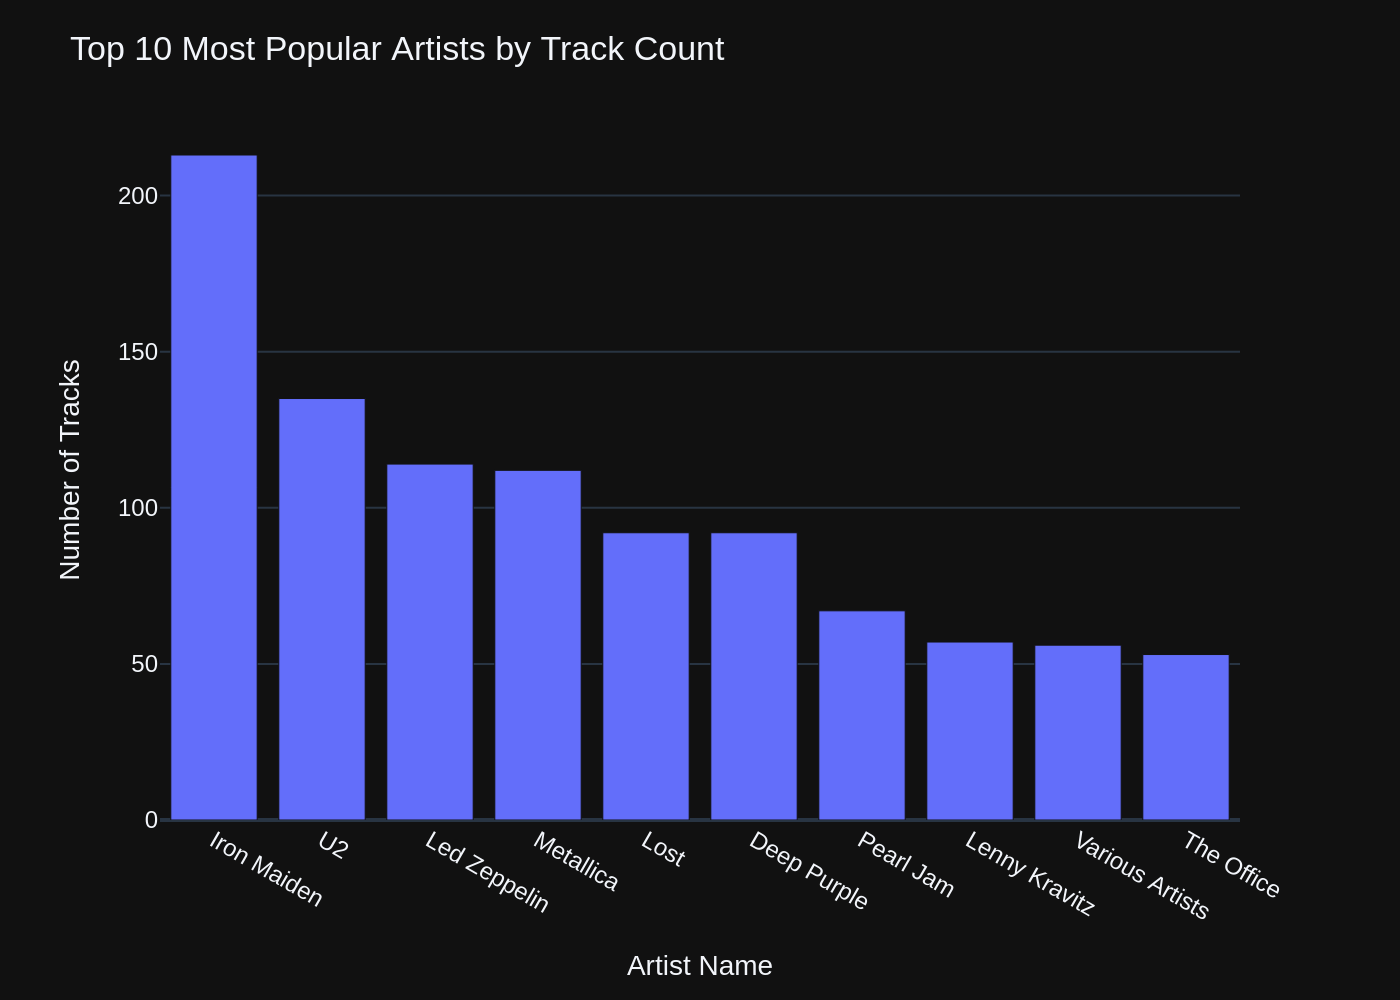





# QUESTION  - 19:  List all customers from Canada and their email addresses:



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT Country, Email
FROM customers
WHERE Country = 'Canada' LIMIT 20


[( <DataFrame> )]
queried dataframe



,Country,Email
0,Canada,ftremblay@gmail.com
1,Canada,mphilips12@shaw.ca
2,Canada,jenniferp@rogers.ca
3,Canada,robbrown@shaw.ca
4,Canada,edfrancis@yachoo.ca
5,Canada,marthasilk@gmail.com
6,Canada,aaronmitchell@yahoo.ca
7,Canada,ellie.sullivan@shaw.ca



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='Country', y='Email', height=500)

if len(df) == 1:
    fig = px.bar(x=df['Country'], y=df['Email'])
else:
    pass

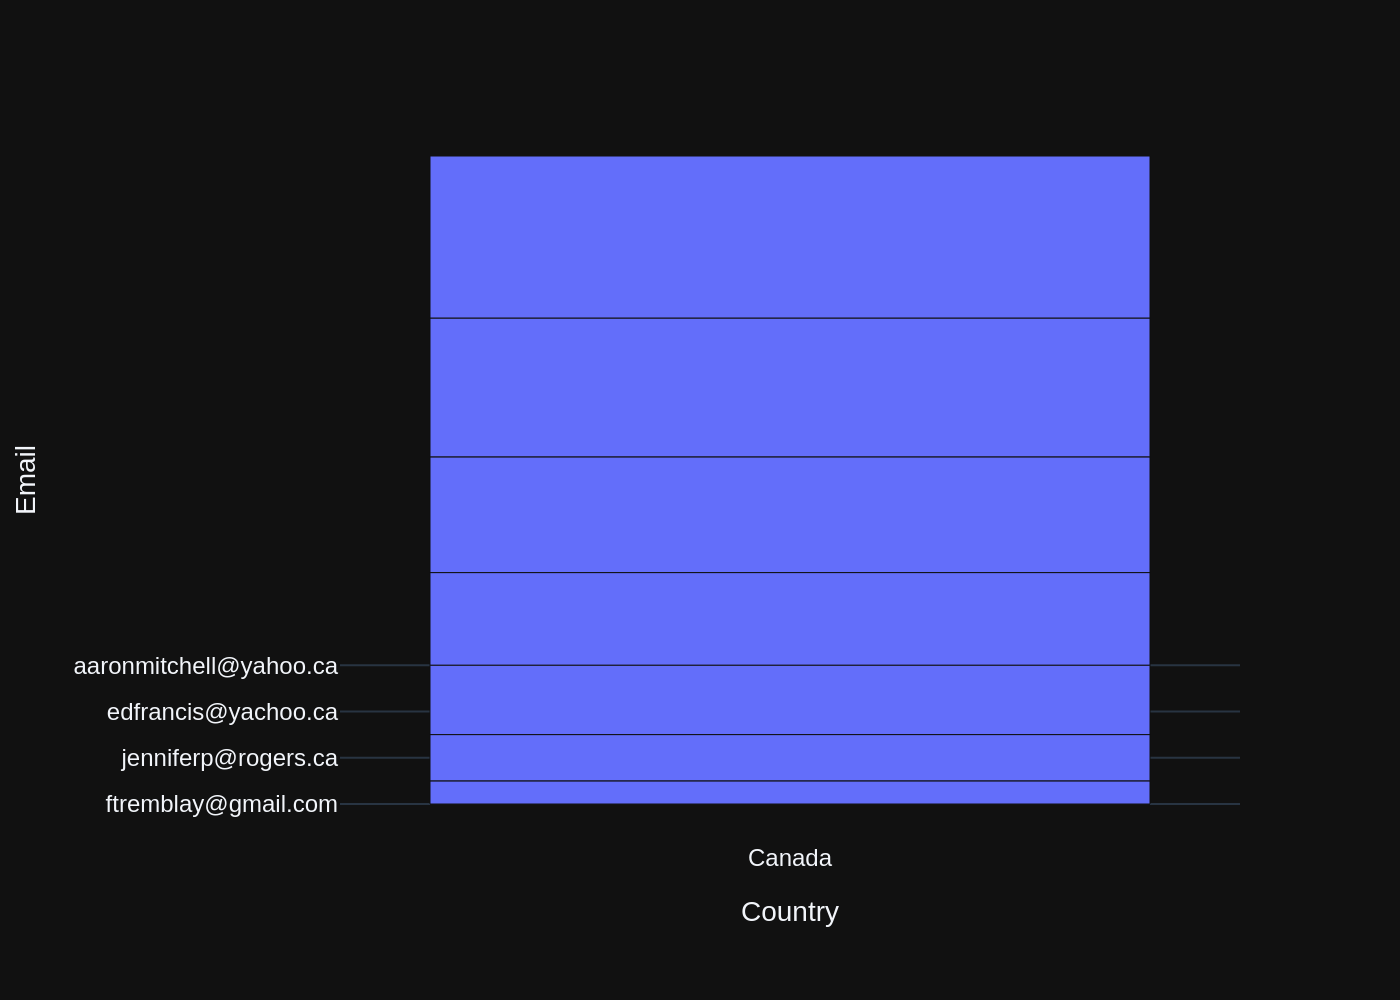





# QUESTION  - 20:  Find the customer with the most invoices 



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, COUNT(i.InvoiceId) as 'Total Invoices'
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY c.CustomerId
ORDER BY `Total Invoices` DESC LIMIT 1


[( <DataFrame> )]
queried dataframe



,CustomerId,Total Invoices
0,1,7



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.bar(x=df['CustomerID'], y=df['Total Invoices'])
else:
    fig = px.bar(df, x='CustomerID', y='Total Invoices')
fig.update_layout(title_text='Customer with the most invoices',
                  xaxis_title_text='Customer ID',
                  yaxis_title_text='Total Invoices')

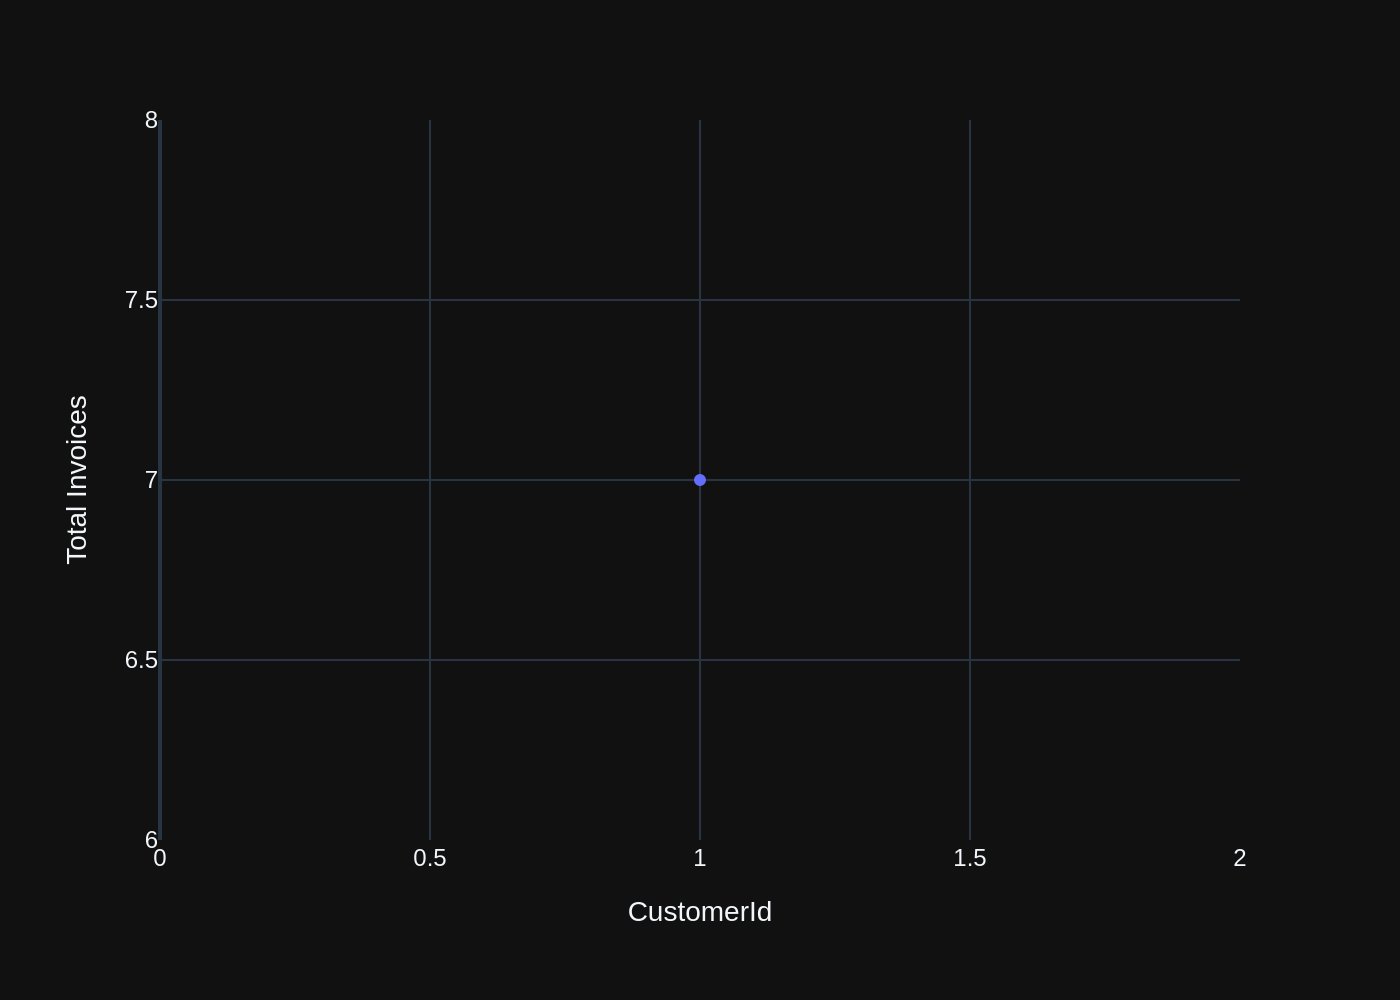





# QUESTION  - 21:  Find the customer who bought the most albums in total quantity (across all invoices):



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, SUM(ii.Quantity) as 'Total Albums Purchased'
FROM customers c
JOIN invoice_items ii ON c.CustomerId = ii.CustomerId
GROUP BY c.CustomerId ORDER BY `Total Albums Purchased` DESC LIMIT 1


[( RETRY )]
***** 1 *****


Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( RETRY )]
***** 2 *****


Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, SUM(ii.Quantity) as 'Total Albums Purchased'
FROM customers c
JOIN invoice_items ii ON c.CustomerId = ii.InvoiceId
GROUP BY c.CustomerId ORDER BY `Total Albums Purchased` DESC LIMIT 1


[( <DataFrame> )]
queried dataframe



,CustomerId,Total Albums Purchased
0,5,14



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.bar(x=df['CustomerID'], y=df['Total Albums Purchased'])
else:
    fig = px.bar(df, x='CustomerID', y='Total Albums Purchased')

fig.update_layout(
    title='Customers by Total Albums Purchased',
    xaxis_title='Customer ID',
    yaxis_title='Total Albums Purchased'
)

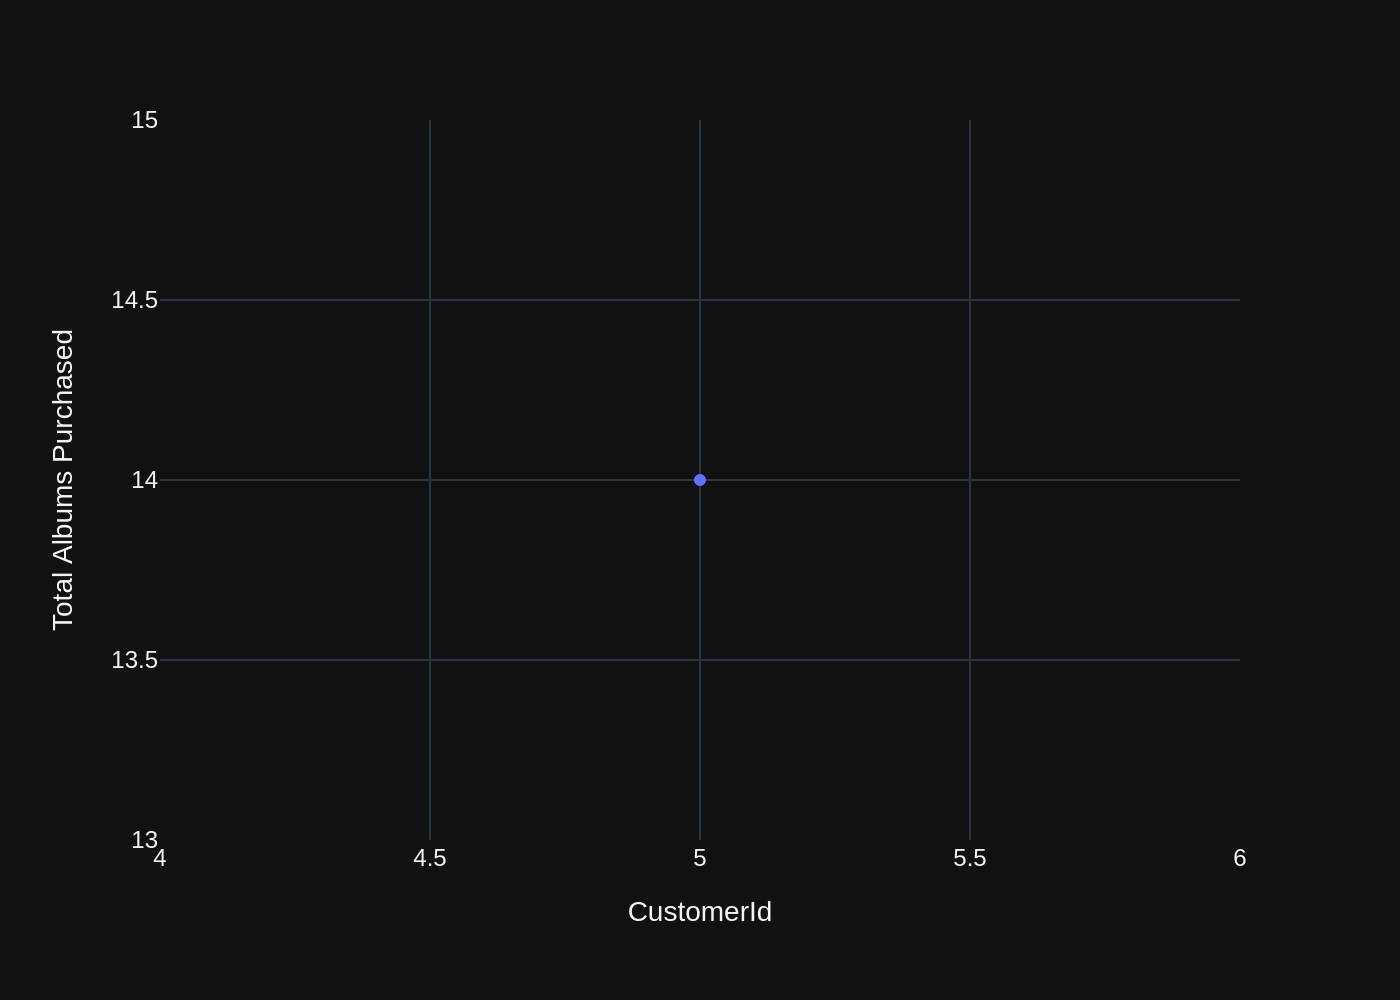





# QUESTION  - 22:        
        Find the top 5 customers who bought the most albums in total quantity (across all invoices):
        Hint: album quantity is found in invoice_items, 
    



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT c.CustomerId, SUM(ii.Quantity) as 'Total Albums Purchased'
FROM customers c
JOIN invoice_items ii ON c.CustomerId = i.CustomerId
JOIN invoices i ON ii.InvoiceId = i.InvoiceId
GROUP BY c.CustomerId
ORDER BY `Total Albums Purchased` DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,CustomerId,Total Albums Purchased
0,1,38
1,2,38
2,3,38
3,4,38
4,5,38



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.bar(x=df['CustomerID'], y=df['Total Albums Purchased'])
else:
    fig = px.bar(df, x='CustomerId', y='Total Albums Purchased')

fig.update_layout(title_text='Top 5 Customers by Total Albums Purchased',
                  xaxis_title_text='Customer ID',
                  yaxis_title_text='Total Albums Purchased')

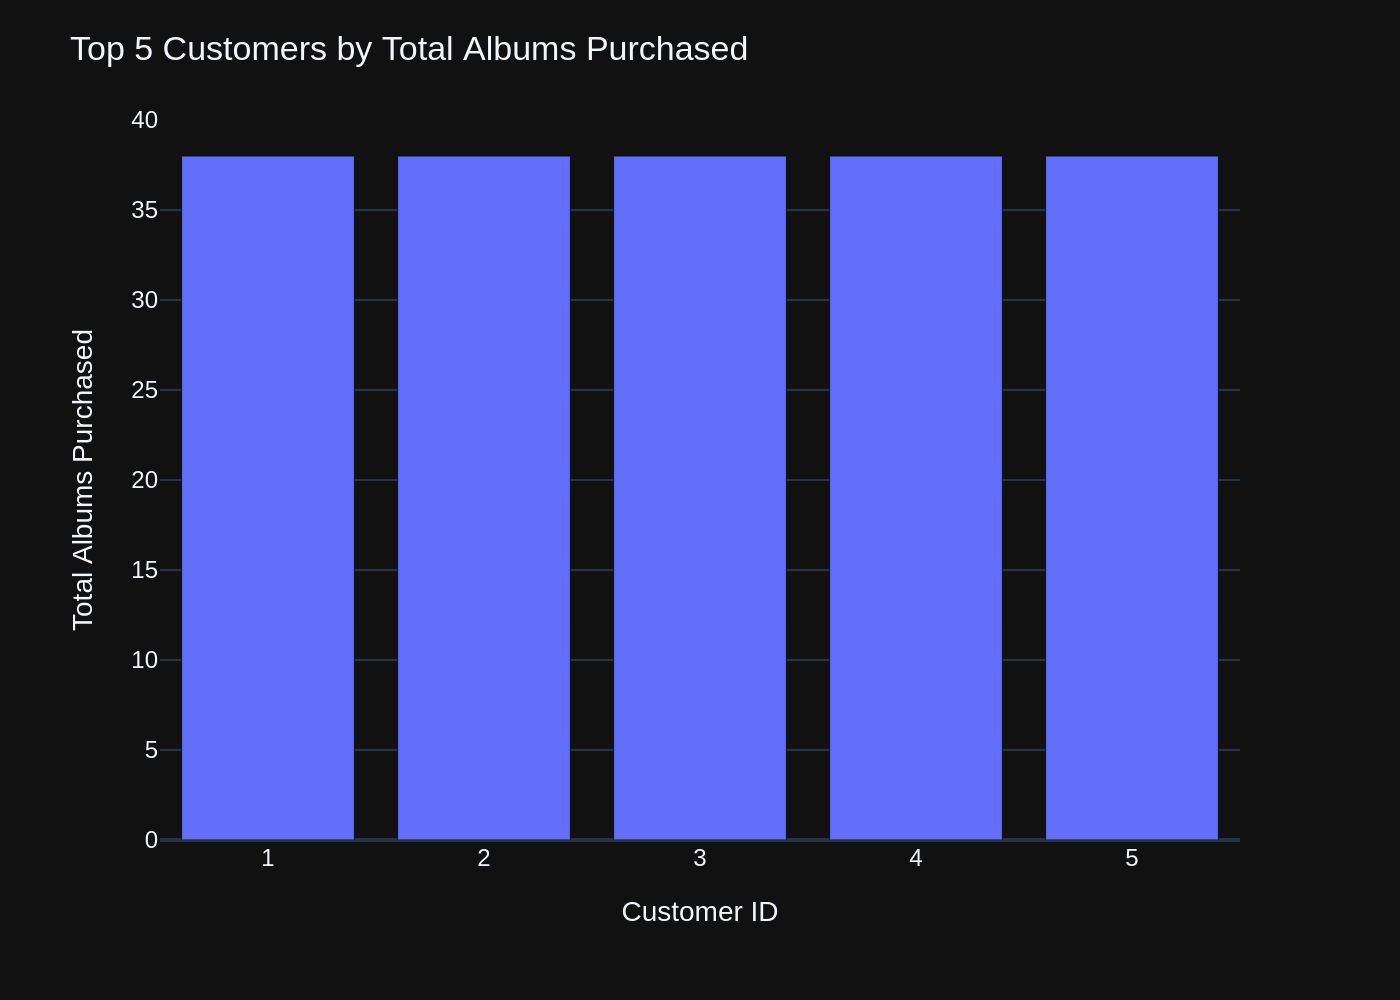





# QUESTION  - 23:    
         Find the top 5 customers who spent the most money overall,  
         Hint: order total can be found on invoices table, calculation using invoice_items detail table is unnecessary 
    



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT CustomerId, SUM(Total) as 'Total Spent' FROM invoices GROUP BY CustomerId ORDER BY `Total Spent` DESC LIMIT 5


[( <DataFrame> )]
queried dataframe



,CustomerId,Total Spent
0,6,49.62
1,26,47.62
2,57,46.62
3,45,45.62
4,46,45.62



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x="Total Spent", y="CustomerId", orientation='h')
fig.update_layout(title='Top 5 Customers by Total Spent',
                  xaxis_title='Total Spent',
                  yaxis_title='Customer ID')

if len(df) == 1:
    import plotly.graph_objects as go
    fig = go.Figure(data=[go.Indicator(
        mode="number+delta",
        value=df['Total Spent'].values[0],
        title={'text': "Top Customer by Total Spent", 'xanchor': 'center'},
        delta={'reference': 10000000, 'valueformat': ".1%"},
        number={'valueformat': ".2f"})])

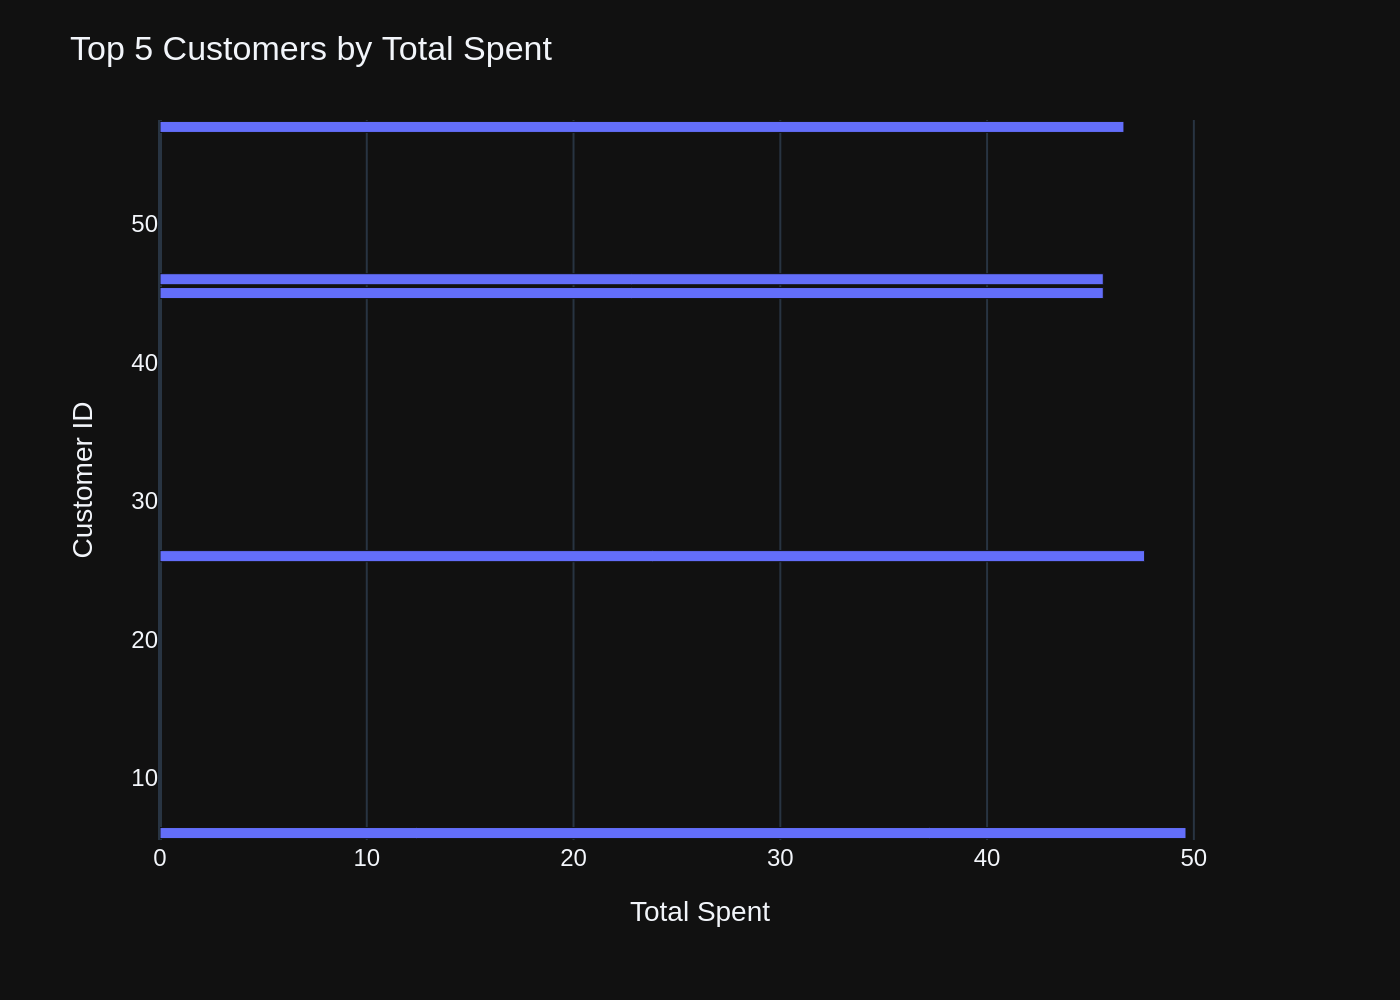





# QUESTION  - 24:  Get all playlists containing at least 10 tracks and the total duration of those tracks:



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT P.Name, SUM(T.Milliseconds / 1000) as 'Total Duration'
FROM playlists P
JOIN playlist_track PT ON P.PlaylistId = PT.PlaylistId
JOIN tracks T ON PT.TrackId = T.TrackId
GROUP BY P.Name
HAVING COUNT(P.Name) >= 10 LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name,Total Duration
0,90’s Music,397970
1,Brazilian Music,9464
2,Classical,21736
3,Classical 101 - Deep Cuts,6742
4,Classical 101 - Next Steps,7565
5,Classical 101 - The Basics,7429
6,Grunge,4114
7,Heavy Metal Classic,8189
8,Music,1752098
9,TV Shows,1001974



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

if len(df) == 1:
    fig = px.bar(x=df['Name'], y=df['Total Duration'])
else:
    fig = px.bar(df, x='Name', y='Total Duration')
    
fig.update_layout(
    title_text='Playlists with at least 10 tracks and total duration',
    showlegend=False
)

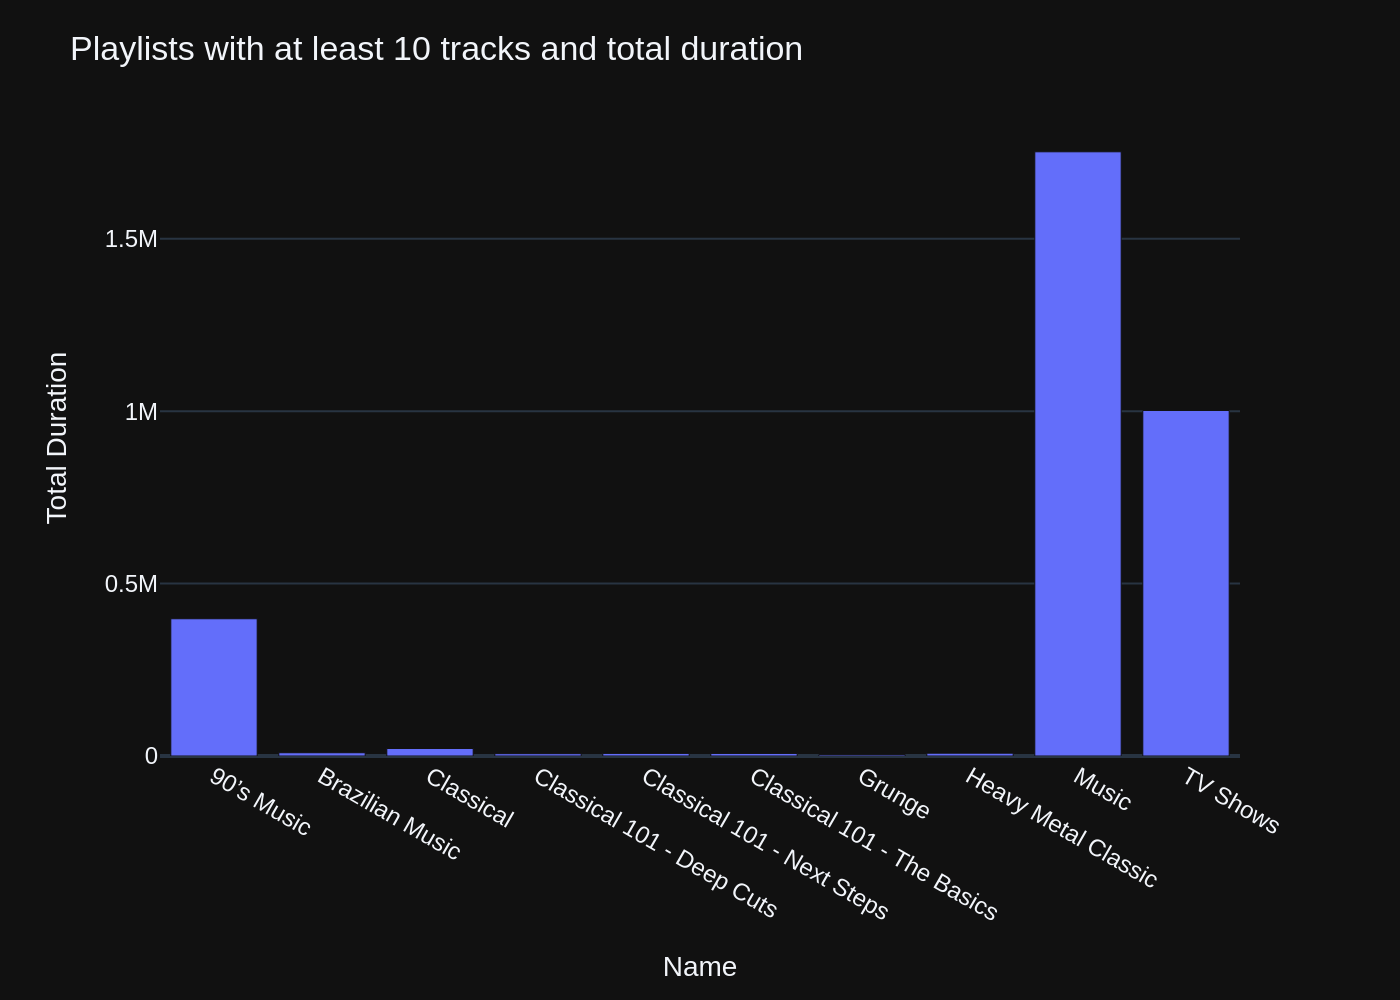





# QUESTION  - 25:  Identify artists who have albums with tracks appearing in multiple genres:



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <SQL> )]
generated SQL statement



SELECT T3.Name, COUNT(T2.AlbumId) as 'Albums'
FROM tracks AS T1
JOIN albums AS T2 ON T1.AlbumId = T2.AlbumId 
JOIN artists AS T3 ON T2.ArtistId = T3.ArtistId
GROUP BY T3.Name HAVING COUNT(DISTINCT T1.GenreId) > 1 LIMIT 20


[( <DataFrame> )]
queried dataframe



,Name,Albums
0,Amy Winehouse,23
1,Antônio Carlos Jobim,31
2,Audioslave,40
3,Battlestar Galactica,20
4,Eric Clapton,48
5,Faith No More,52
6,Foo Fighters,44
7,Gilberto Gil,32
8,Guns N' Roses,42
9,Heroes,23



Ollama parameters:
model=llama3.1:latest,
options={'gpu': True},
keep_alive=None


[( <Python> )]
generated Plotly code



import plotly.express as px

fig = px.bar(df, x='Name', y='Albums')
fig.update_layout(title='Artists with Albums in Multiple Genres',
                   xaxis_title='Artist Name',
                   yaxis_title='Number of Albums')

if len(df) == 1:
    fig = px.bar(x=df['Name'], y=df['Albums'])
else:
    pass

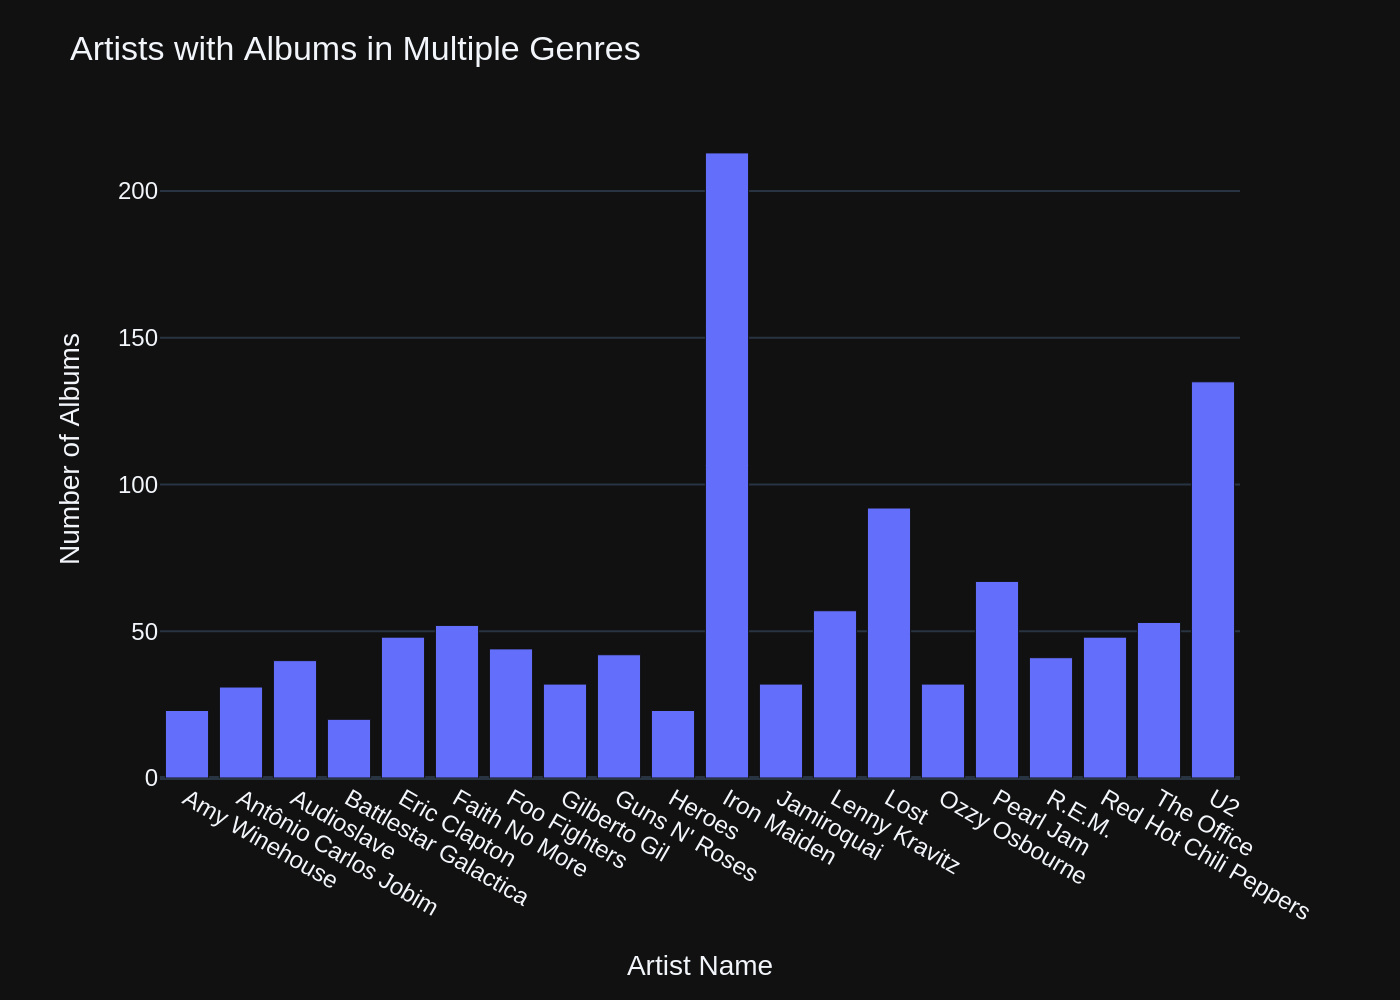

In [16]:
ts_start = time()
for n, question in enumerate(questions):
    # if n != 4: continue
    # if n > 5: continue

    resp = vn.ask_adaptive(question=question, tag_id=n+2)
    # vn.ask(question=question, allow_llm_to_see_data=allow_llm_to_see_data)
    # my_vn_ask(question=question, sql_id=n+2, allow_llm_to_see_data=allow_llm_to_see_data)

ts_stop = time()
elapsed_time = ts_stop - ts_start

### Check completion time

In [17]:
elapsed_time

156.7196090221405

In [18]:
str_elapsed_sec = f"{elapsed_time:.0f}"
ts = datetime.now().strftime("%Y%m%d-%H%M%S")
print(f"Completed testing:\n================\n LLM model '{model_name}' \n took {str_elapsed_sec} sec\n run on '{hostname}' \n at {ts}")

Completed testing:
 LLM model 'llama3.1' 
 took 157 sec
 run on 'ducklover1' 
 at 20241121-232248


In [19]:
file_csv = f"training_data-{model_name}-{str_elapsed_sec}s-{hostname}-{ts}.csv"
file_csv

'training_data-llama3.1-157s-ducklover1-20241121-232248.csv'

### Save training data

In [20]:
# show training data
df_training_data = vn.get_training_data()
df_training_data

,id,question,content,training_data_type
0,149754a0-aae5-526d-a24f-aa41a6f95d75-sql,which table stores customer's orders,SELECT name FROM sqlite_master WHERE type='tab...,sql
1,1652acd1-1574-52d1-a36a-4b15204d315f-sql,List all customers from Canada and their email...,"SELECT Country, Email\nFROM customers\nWHERE C...",sql
2,29b9dc23-b592-5dae-9c0a-324a99149b7a-sql,Find the customer with the most invoices,"SELECT c.CustomerId, COUNT(i.InvoiceId) as 'To...",sql
3,335ea897-52e8-5a05-92af-dfa7beb40ce0-sql,Get all playlists containing at least 10 track...,"SELECT P.Name, SUM(T.Milliseconds / 1000) as '...",sql
4,3fcf7ae2-0b4b-5770-8354-1aa3c5c49cdc-sql,Find the top 5 most expensive tracks (based on...,"SELECT TrackId, UnitPrice \nFROM tracks \nORDE...",sql
5,432812d6-ffa2-5f2c-96de-9b34c1affe2f-sql,Identify artists who have albums with tracks a...,"SELECT T3.Name, COUNT(T2.AlbumId) as 'Albums'\...",sql
6,4514ddd5-d14a-5252-a0a9-df53aa14a825-sql,\n Find the top 5 customers who spen...,"SELECT CustomerId, SUM(Total) as 'Total Spent'...",sql
7,47613bb3-6ec0-5476-b654-0125fb03f615-sql,List all employees and their reporting manager...,"SELECT T1.FirstName, T1.LastName, COALESCE(T2....",sql
8,560dacd9-7bd4-5b99-a493-2a51f5832154-sql,Find all invoices since 2010 and the total amo...,"SELECT InvoiceDate, Total \nFROM invoices \nWH...",sql
9,6c7d66a9-5582-56db-90c6-f33ac6f83ac7-sql,\n Generating SQL for this ...,"SELECT c.CustomerId, SUM(ii.Quantity) as 'Tota...",sql


In [21]:
df_training_data.to_csv(file_csv, index=False)